<a href="https://colab.research.google.com/github/Pranavi2709/Bio-Inspired-Feature-Selection-and-Fusion-for-Facial-Emotion-Recognition/blob/main/FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**PREPROCESSING**

In [ ]:
import pandas as pd
column_names=["SNo","ImageName","Emotion"]
for i in [1,2,4,5,6,7,9,10,11,12,13,14,15,16,17,18,20,21,23,24,25,26,27,28,29,31,34,38,39,43]:
  name="AU_{x}".format(x=i)
  column_names.append(name)
# Create the pandas DataFrame with column name is provided explicitly
df = pd.DataFrame(columns=column_names)

# print dataframe.
df

,SNo,ImageName,Emotion,AU_1,AU_2,AU_4,AU_5,AU_6,AU_7,AU_9,...,AU_25,AU_26,AU_27,AU_28,AU_29,AU_31,AU_34,AU_38,AU_39,AU_43


In [ ]:
import os
import pandas as pd
sno=1
path='/content/drive/MyDrive/CK+_Images_Emotions_FACS'
path1=os.path.join(path,'FACS')
path2=os.path.join(path,'Emotion')
au_entries1 = os.listdir(path1)
for entry1 in au_entries1:
  if(entry1!='.DS_Store'):
    au_entries2 = os.path.join(path1, entry1)
    #print(au_entries2)
    for entry2 in os.listdir(au_entries2):
      #print(entry2)
      if(entry2!='.DS_Store'):
        au_entry3 = os.path.join(au_entries2,entry2)
        if(len(au_entry3)!=0):
          if(au_entry3!='.DS_Store'):
            for entry3 in os.listdir(au_entry3):
                entry4= os.path.join(au_entry3,entry3)
                #print(entry4)
                with open(entry4) as f:
                 #print("Opening file : "+au_entry3)
                  data=f.read()
                  action_units=data.split("\n") #action_units->list of [AU,value]
                  #print(action_units)
                  action_units=action_units[:-1]
                  if(action_units[-1]==''):
                    action_units=action_units[:-1]
                  au_values=["-1" for i in range(33)]
                  for action_unit in action_units:
                    extract=action_unit.split(" ") #action_unit-> list of AU,value and whitespaces
                    #print(extract)
                    reqd=[]
                    for those in extract:
                      if(those!=''):
                        reqd.append(float(those))
                    # print(int(reqd[0]),reqd[1])
                    #search index to store reqd_1
                  #au_values[int(reqd[0])+2] = reqd[1]
                  #txt3 = "My name is {}, I'm {}".format("John",36)
                    index="AU_{x}".format(x=int(reqd[0]))
                    print(index,entry4)
                    df.at[sno,index]=reqd[1]

                  df.at[sno,'SNo']=sno
                  imagename=entry4[-35:-8]
                  #print(imagename[9:-1])
                  df.at[sno,'ImageName'] = imagename[9:-1]
                  emotions_file=os.path.join(path2,imagename)+"emotion.txt"
                  if(os.path.exists(emotions_file)):
                    with open(emotions_file) as f1:
                      data1=f1.read()
                      emotion=data1.split()
                      df.at[sno,'Emotion']=int(float(emotion[0]))
                  else:
                    df.at[sno,'Emotion']=-1
                  #df.at[sno,'Emotion'] =
                  #au_values[0] = sno
                  sno=sno+1
                  #writer.writerow(au_values)
#df.to_csv("FACS_Emotions_Labels_demo.csv", index=False)
print(df)

AU_1 /content/drive/MyDrive/CK+_Images_Emotions_FACS/FACS/S130/002/S130_002_00000030_facs.txt
AU_4 /content/drive/MyDrive/CK+_Images_Emotions_FACS/FACS/S130/002/S130_002_00000030_facs.txt
AU_7 /content/drive/MyDrive/CK+_Images_Emotions_FACS/FACS/S130/002/S130_002_00000030_facs.txt
AU_11 /content/drive/MyDrive/CK+_Images_Emotions_FACS/FACS/S130/002/S130_002_00000030_facs.txt
AU_14 /content/drive/MyDrive/CK+_Images_Emotions_FACS/FACS/S130/002/S130_002_00000030_facs.txt
AU_20 /content/drive/MyDrive/CK+_Images_Emotions_FACS/FACS/S130/002/S130_002_00000030_facs.txt
AU_25 /content/drive/MyDrive/CK+_Images_Emotions_FACS/FACS/S130/002/S130_002_00000030_facs.txt
AU_15 /content/drive/MyDrive/CK+_Images_Emotions_FACS/FACS/S130/004/S130_004_00000019_facs.txt
AU_17 /content/drive/MyDrive/CK+_Images_Emotions_FACS/FACS/S130/004/S130_004_00000019_facs.txt
AU_25 /content/drive/MyDrive/CK+_Images_Emotions_FACS/FACS/S130/005/S130_005_00000009_facs.txt
AU_1 /content/drive/MyDrive/CK+_Images_Emotions_FACS/

In [ ]:
import pandas as pd
data = pd.read_csv("/content/imp.csv")
df2=data[data["Emotion"] != -1]
print("Non NaN values:\n",df2.count())
print(df2)
df2=df2.dropna(axis=1, how='all') #remove AUs not present in any image
df2 = df2.fillna(df2.mean())
print(df2)
df2.to_csv("demo.csv", index=False)

Non NaN values:
 SNo          327
ImageName    327
Emotion      327
AU_1         131
AU_2          99
AU_4         122
AU_5          92
AU_6          95
AU_7          79
AU_9          61
AU_10         15
AU_11          2
AU_12         80
AU_13          2
AU_14         32
AU_15         33
AU_16         12
AU_17        114
AU_18          6
AU_20         27
AU_21          1
AU_23         43
AU_24         43
AU_25        181
AU_26         19
AU_27         72
AU_28          1
AU_29          0
AU_31          2
AU_34          1
AU_38         24
AU_39          8
AU_43          2
AU_45          5
AU_54          1
AU_63          2
AU_62          1
AU_22          0
AU_30          1
AU_61          0
AU_64          2
AU_44          0
dtype: int64
     SNo          ImageName  Emotion  AU_1  AU_2  AU_4  AU_5  AU_6  AU_7  \
3      4  S130_001_00000018        7   0.0   0.0   NaN   0.0   NaN   NaN   
4      5  S130_007_00000020        1   NaN   NaN   0.0   NaN   NaN   0.0   
6      7  S130_013_00000015 

<ipython-input-7-1947de72b83e>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2 = df2.fillna(df2.mean())


In [ ]:
#reading demo.csv file directly into dataframe
import pandas as pd
df2 = pd.read_csv('/content/sample_data/demo.csv')

**IMPLEMENTATION OF PSO-old one**

In [ ]:
#cloning python library for feature subset selection using PSO
!git clone "https://github.com/mohan02teja/Py_FS"

Cloning into 'Py_FS'...
remote: Enumerating objects: 2201, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 2201 (delta 19), reused 0 (delta 0), pack-reused 2172
Receiving objects: 100% (2201/2201), 41.69 MiB | 13.41 MiB/s, done.
Resolving deltas: 100% (1336/1336), done.


In [ ]:
#installing the requirements
!pip3 install -r "/content/Py_FS/requirements.txt"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 KB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ReliefF: filename=ReliefF-0.1.2-py3-none-any.whl size=6318 sha256=3ac01c5f2c2a26056754f440e95176d6903c55e884f8ac46d81f9c963b649e8d
  Stored in directory: /root/.cache/pip/wheels/d8/90/ef/7691706c1c418d2c266a0b3b06371900f4b86e74223912c563
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=a0a860fa24fc1deb0de3ba5e6e085c0f97689d331f47919d7868f459483189e9
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built ReliefF sklearn


In [ ]:
cd Py_FS

/content/Py_FS


In [ ]:
ls

 build/    LICENSE    Py_FS.egg-info/          requirements.txt   upload.sh
 dist/     Makefile  'Py_FS User Manual.pdf'   setup.py
 Images/   Py_FS/     README.md                test_plots/


In [ ]:
#creating array1 containing all the features (action units)
df3=df2.drop(['SNo','ImageName','Emotion'],axis=1)#entire face
eye_features = ['AU_5','AU_7','AU_43','AU_45','AU_62','AU_63','AU_64']
mouth_features=['AU_13','AU_14','AU_15','AU_16','AU_17','AU_18','AU_20','AU_23','AU_24','AU_25','AU_26','AU_27','AU_28']
df4 = pd.DataFrame(df3, columns=eye_features)
df5 = pd.DataFrame(df3, columns=mouth_features)
array3 = df3.to_numpy()#entire face
array4= df4.to_numpy()
array5= df5.to_numpy()
#print(array3)
#creating arrray2 containing all the labels (emotions)
label= df2['Emotion'].values
print(label)


[7 1 5 3 6 7 5 6 3 5 6 4 1 6 2 6 1 4 2 6 5 3 7 2 2 7 5 1 6 3 5 1 7 5 2 6 4
 3 7 5 7 6 3 7 3 3 7 5 7 1 5 6 3 7 7 3 5 1 5 1 6 1 5 7 1 7 3 3 1 5 7 1 7 5
 6 4 5 7 3 7 5 6 3 7 7 5 1 7 1 5 6 5 1 3 5 1 3 7 4 6 1 5 7 1 3 7 3 3 5 1 7
 7 5 1 7 5 3 3 5 7 3 5 7 7 5 3 7 3 5 3 4 5 7 1 5 7 4 7 4 3 1 5 3 5 7 7 3 1
 6 7 5 4 6 3 7 1 5 7 2 4 7 6 7 5 1 7 5 3 5 6 7 2 7 4 3 7 5 1 2 4 1 1 5 3 3
 3 7 4 5 7 6 2 7 5 1 1 4 6 2 2 4 1 2 5 3 4 6 7 2 7 5 2 1 2 6 3 5 7 2 5 1 7
 3 3 6 1 5 7 7 5 3 5 7 1 6 3 7 5 2 6 7 1 3 7 5 6 3 7 7 5 3 4 7 7 3 6 4 7 3
 1 5 7 3 5 7 3 5 7 3 5 7 5 7 3 4 3 5 7 5 4 5 1 7 3 7 4 5 1 5 3 4 7 3 2 5 7
 5 3 7 4 7 4 1 3 5 7 5 3 7 7 1 4 5 1 7 7 1 7 1 3 5 7 3 7 1 3 5]


Streaming output truncated to the last 5000 lines.
------------- Best Agent ---------------
Fitness: 0.6580419580419581
Number of Features: 9
----------------------------------------

Particle 1 - Fitness: 0.6580419580419581, Number of Features: 9
Particle 2 - Fitness: 0.6034965034965035, Number of Features: 9
Particle 3 - Fitness: 0.5874125874125874, Number of Features: 4
Particle 4 - Fitness: 0.5157342657342657, Number of Features: 8
Particle 5 - Fitness: 0.42972027972027976, Number of Features: 5


                          Iteration - 753


Number of agents: 5

------------- Best Agent ---------------
Fitness: 0.7006993006993006
Number of Features: 7
----------------------------------------

Particle 1 - Fitness: 0.7006993006993006, Number of Features: 7
Particle 2 - Fitness: 0.6811188811188812, Number of Features: 6
Particle 3 - Fitness: 0.6265734265734266, Number of Features: 6
Particle 4 - Fitness: 0.6171328671328671, Number of Features: 9
Particle 5 - Fitness: 0.314685314685314

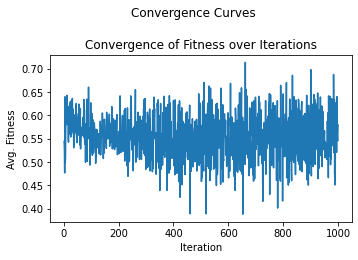

In [ ]:
from Py_FS.wrapper.nature_inspired.PSO import PSO as FS
solution = FS(num_agents=5, max_iter=1000, train_data=array5, train_label=label, save_conv_graph=True)

Iterations - 2000

Leader Particle Dimension : 15

Leader Particle Features :
1.0,
0.0,
1.0,
0.0,
1.0,
0.0,
1.0,
0.0,
1.0,
0.0,
0.0,
1.0,
0.0,
0.0,
1.0,
0.0,
1.0,
0.0,
0.0,
1.0,
0.0,
0.0,
0.0,
0.0,
0.0,
1.0,
1.0,
1.0,
1.0,
1.0,
0.0,
0.0,
0.0,
1.0,
0.0

Leader Particle Fitness : 0.9435064935064935

Leader Particle Classification Accuracy : 0.9848484848484849


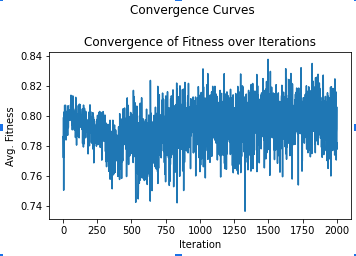


**IMPLEMENTATION OF FIREFLY**


In [ ]:
#Cloning git repository for Firefly Feature Subset selection
!git clone "https://github.com/JingweiToo/Wrapper-Feature-Selection-Toolbox-Python.git"

Cloning into 'Wrapper-Feature-Selection-Toolbox-Python'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 163 (delta 38), reused 59 (delta 36), pack-reused 102
Receiving objects: 100% (163/163), 81.51 KiB | 2.63 MiB/s, done.
Resolving deltas: 100% (101/101), done.


In [ ]:
#cd to FS folder, upload try.py. Change FS.fa to fa, and likewise.


In [ ]:
cd Wrapper-Feature-Selection-Toolbox-Python

/content/Wrapper-Feature-Selection-Toolbox-Python


In [ ]:
cd FS

/content/Wrapper-Feature-Selection-Toolbox-Python/FS


In [ ]:
%matplotlib inline

[7 1 5 3 6 7 5 6 3 5 6 4 1 6 2 6 1 4 2 6 5 3 7 2 2 7 5 1 6 3 5 1 7 5 2 6 4
 3 7 5 7 6 3 7 3 3 7 5 7 1 5 6 3 7 7 3 5 1 5 1 6 1 5 7 1 7 3 3 1 5 7 1 7 5
 6 4 5 7 3 7 5 6 3 7 7 5 1 7 1 5 6 5 1 3 5 1 3 7 4 6 1 5 7 1 3 7 3 3 5 1 7
 7 5 1 7 5 3 3 5 7 3 5 7 7 5 3 7 3 5 3 4 5 7 1 5 7 4 7 4 3 1 5 3 5 7 7 3 1
 6 7 5 4 6 3 7 1 5 7 2 4 7 6 7 5 1 7 5 3 5 6 7 2 7 4 3 7 5 1 2 4 1 1 5 3 3
 3 7 4 5 7 6 2 7 5 1 1 4 6 2 2 4 1 2 5 3 4 6 7 2 7 5 2 1 2 6 3 5 7 2 5 1 7
 3 3 6 1 5 7 7 5 3 5 7 1 6 3 7 5 2 6 7 1 3 7 5 6 3 7 7 5 3 4 7 7 3 6 4 7 3
 1 5 7 3 5 7 3 5 7 3 5 7 5 7 3 4 3 5 7 5 4 5 1 7 3 7 4 5 1 5 3 4 7 3 2 5 7
 5 3 7 4 7 4 1 3 5 7 5 3 7 7 1 4 5 1 7 7 1 7 1 3 5 7 3 7 1 3 5]
Generation: 1
Best (FA): 0.15599999999999997
Generation: 2
Best (FA): 0.12466666666666666
Generation: 3
Best (FA): 0.12466666666666666
Generation: 4
Best (FA): 0.12466666666666666
Generation: 5
Best (FA): 0.12466666666666666
Generation: 6
Best (FA): 0.12466666666666666
Generation: 7
Best (FA): 0.12466666666666666
Generation: 8
Best (F

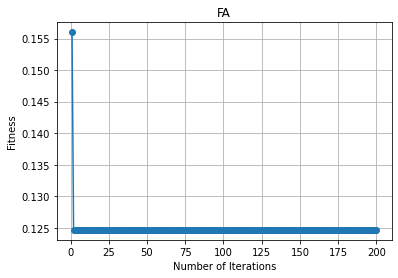

Generation: 1
Best (FA): 0.12733333333333333
Generation: 2
Best (FA): 0.12533333333333332
Generation: 3
Best (FA): 0.12533333333333332
Generation: 4
Best (FA): 0.12533333333333332
Generation: 5
Best (FA): 0.12533333333333332
Generation: 6
Best (FA): 0.124
Generation: 7
Best (FA): 0.124
Generation: 8
Best (FA): 0.124
Generation: 9
Best (FA): 0.124
Generation: 10
Best (FA): 0.124
Generation: 11
Best (FA): 0.124
Generation: 12
Best (FA): 0.124
Generation: 13
Best (FA): 0.124
Generation: 14
Best (FA): 0.12333333333333334
Generation: 15
Best (FA): 0.12333333333333334
Generation: 16
Best (FA): 0.12333333333333334
Generation: 17
Best (FA): 0.12333333333333334
Generation: 18
Best (FA): 0.12333333333333334
Generation: 19
Best (FA): 0.12333333333333334
Generation: 20
Best (FA): 0.12333333333333334
Generation: 21
Best (FA): 0.12333333333333334
Generation: 22
Best (FA): 0.12333333333333334
Generation: 23
Best (FA): 0.12333333333333334
Generation: 24
Best (FA): 0.12333333333333334
Generation: 25
Be

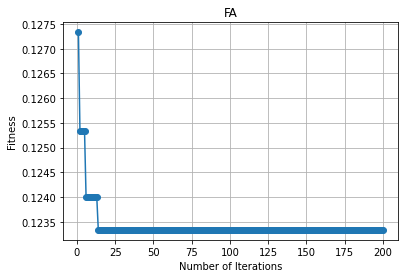

Generation: 1
Best (FA): 0.12466666666666666
Generation: 2
Best (FA): 0.09400000000000003
Generation: 3
Best (FA): 0.06599999999999995
Generation: 4
Best (FA): 0.06533333333333328
Generation: 5
Best (FA): 0.06466666666666662
Generation: 6
Best (FA): 0.06466666666666662
Generation: 7
Best (FA): 0.06466666666666662
Generation: 8
Best (FA): 0.06466666666666662
Generation: 9
Best (FA): 0.06466666666666662
Generation: 10
Best (FA): 0.06466666666666662
Generation: 11
Best (FA): 0.06466666666666662
Generation: 12
Best (FA): 0.06466666666666662
Generation: 13
Best (FA): 0.06466666666666662
Generation: 14
Best (FA): 0.06466666666666662
Generation: 15
Best (FA): 0.06466666666666662
Generation: 16
Best (FA): 0.06466666666666662
Generation: 17
Best (FA): 0.06466666666666662
Generation: 18
Best (FA): 0.06466666666666662
Generation: 19
Best (FA): 0.06466666666666662
Generation: 20
Best (FA): 0.06466666666666662
Generation: 21
Best (FA): 0.06466666666666662
Generation: 22
Best (FA): 0.064666666666666

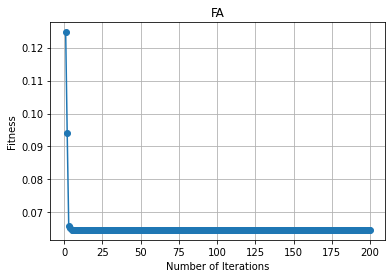

Generation: 1
Best (FA): 0.24466666666666667
Generation: 2
Best (FA): 0.15666666666666665
Generation: 3
Best (FA): 0.15666666666666665
Generation: 4
Best (FA): 0.15599999999999997
Generation: 5
Best (FA): 0.12466666666666666
Generation: 6
Best (FA): 0.12466666666666666
Generation: 7
Best (FA): 0.12466666666666666
Generation: 8
Best (FA): 0.12466666666666666
Generation: 9
Best (FA): 0.12466666666666666
Generation: 10
Best (FA): 0.12466666666666666
Generation: 11
Best (FA): 0.12466666666666666
Generation: 12
Best (FA): 0.12466666666666666
Generation: 13
Best (FA): 0.12466666666666666
Generation: 14
Best (FA): 0.12466666666666666
Generation: 15
Best (FA): 0.12466666666666666
Generation: 16
Best (FA): 0.12466666666666666
Generation: 17
Best (FA): 0.12466666666666666
Generation: 18
Best (FA): 0.12466666666666666
Generation: 19
Best (FA): 0.12466666666666666
Generation: 20
Best (FA): 0.12466666666666666
Generation: 21
Best (FA): 0.12466666666666666
Generation: 22
Best (FA): 0.124666666666666

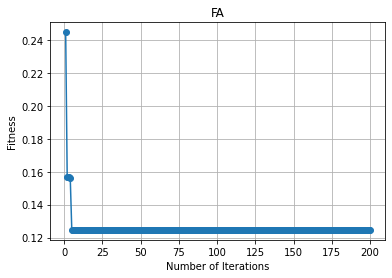

Generation: 1
Best (FA): 0.1553333333333333
Generation: 2
Best (FA): 0.15399999999999997
Generation: 3
Best (FA): 0.15399999999999997
Generation: 4
Best (FA): 0.15399999999999997
Generation: 5
Best (FA): 0.1533333333333333
Generation: 6
Best (FA): 0.1533333333333333
Generation: 7
Best (FA): 0.1533333333333333
Generation: 8
Best (FA): 0.1533333333333333
Generation: 9
Best (FA): 0.1533333333333333
Generation: 10
Best (FA): 0.1533333333333333
Generation: 11
Best (FA): 0.15266666666666664
Generation: 12
Best (FA): 0.15266666666666664
Generation: 13
Best (FA): 0.15266666666666664
Generation: 14
Best (FA): 0.15266666666666664
Generation: 15
Best (FA): 0.15266666666666664
Generation: 16
Best (FA): 0.15266666666666664
Generation: 17
Best (FA): 0.15266666666666664
Generation: 18
Best (FA): 0.15266666666666664
Generation: 19
Best (FA): 0.15266666666666664
Generation: 20
Best (FA): 0.15266666666666664
Generation: 21
Best (FA): 0.15266666666666664
Generation: 22
Best (FA): 0.15266666666666664
Gene

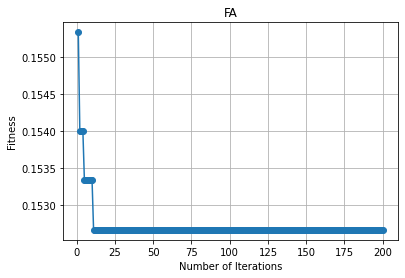

Generation: 1
Best (FA): 0.126
Generation: 2
Best (FA): 0.09533333333333337
Generation: 3
Best (FA): 0.06733333333333329
Generation: 4
Best (FA): 0.06599999999999995
Generation: 5
Best (FA): 0.06599999999999995
Generation: 6
Best (FA): 0.06533333333333328
Generation: 7
Best (FA): 0.06533333333333328
Generation: 8
Best (FA): 0.06533333333333328
Generation: 9
Best (FA): 0.06466666666666662
Generation: 10
Best (FA): 0.06466666666666662
Generation: 11
Best (FA): 0.06466666666666662
Generation: 12
Best (FA): 0.06466666666666662
Generation: 13
Best (FA): 0.06466666666666662
Generation: 14
Best (FA): 0.06466666666666662
Generation: 15
Best (FA): 0.06466666666666662
Generation: 16
Best (FA): 0.06466666666666662
Generation: 17
Best (FA): 0.06466666666666662
Generation: 18
Best (FA): 0.06466666666666662
Generation: 19
Best (FA): 0.06466666666666662
Generation: 20
Best (FA): 0.06466666666666662
Generation: 21
Best (FA): 0.06466666666666662
Generation: 22
Best (FA): 0.06466666666666662
Generation:

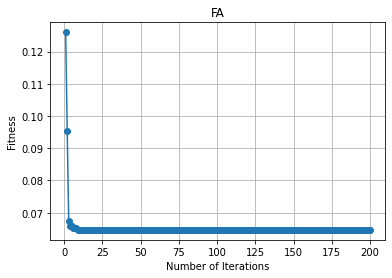

Generation: 1
Best (FA): 0.18599999999999994
Generation: 2
Best (FA): 0.18599999999999994
Generation: 3
Best (FA): 0.18466666666666662
Generation: 4
Best (FA): 0.18466666666666662
Generation: 5
Best (FA): 0.18466666666666662
Generation: 6
Best (FA): 0.18466666666666662
Generation: 7
Best (FA): 0.18466666666666662
Generation: 8
Best (FA): 0.18466666666666662
Generation: 9
Best (FA): 0.18466666666666662
Generation: 10
Best (FA): 0.18466666666666662
Generation: 11
Best (FA): 0.18466666666666662
Generation: 12
Best (FA): 0.18399999999999994
Generation: 13
Best (FA): 0.18399999999999994
Generation: 14
Best (FA): 0.18399999999999994
Generation: 15
Best (FA): 0.18399999999999994
Generation: 16
Best (FA): 0.18399999999999994
Generation: 17
Best (FA): 0.18399999999999994
Generation: 18
Best (FA): 0.18399999999999994
Generation: 19
Best (FA): 0.18399999999999994
Generation: 20
Best (FA): 0.18399999999999994
Generation: 21
Best (FA): 0.18399999999999994
Generation: 22
Best (FA): 0.183999999999999

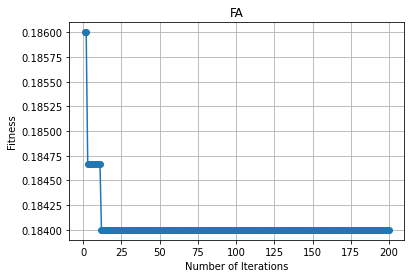

Generation: 1
Best (FA): 0.13041666666666668
Generation: 2
Best (FA): 0.12775
Generation: 3
Best (FA): 0.0988125
Generation: 4
Best (FA): 0.09814583333333333
Generation: 5
Best (FA): 0.09814583333333333
Generation: 6
Best (FA): 0.09814583333333333
Generation: 7
Best (FA): 0.09814583333333333
Generation: 8
Best (FA): 0.09814583333333333
Generation: 9
Best (FA): 0.09814583333333333
Generation: 10
Best (FA): 0.09814583333333333
Generation: 2
Best (FA): 0.06720833333333334
Generation: 3
Best (FA): 0.06654166666666667
Generation: 4
Best (FA): 0.06654166666666667
Generation: 5
Best (FA): 0.06654166666666667
Generation: 6
Best (FA): 0.065875
Generation: 7
Best (FA): 0.06520833333333334
Generation: 8
Best (FA): 0.06520833333333334
Generation: 9
Best (FA): 0.06520833333333334
Generation: 10
Best (FA): 0.06520833333333334
Generation: 11
Best (FA): 0.06520833333333334
Generation: 12
Best (FA): 0.06520833333333334
Generation: 13
Best (FA): 0.06520833333333334
Generation: 14
Best (FA): 0.0652083333

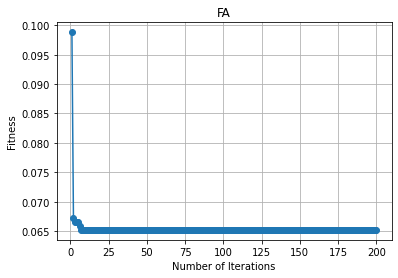

Generation: 1
Best (FA): 0.06720833333333334
Generation: 2
Best (FA): 0.03827083333333334
Generation: 3
Best (FA): 0.036937500000000005
Generation: 4
Best (FA): 0.036270833333333335
Generation: 5
Best (FA): 0.03560416666666667
Generation: 6
Best (FA): 0.03560416666666667
Generation: 7
Best (FA): 0.03560416666666667
Generation: 8
Best (FA): 0.03560416666666667
Generation: 9
Best (FA): 0.03560416666666667
Generation: 10
Best (FA): 0.03560416666666667
Generation: 11
Best (FA): 0.03560416666666667
Generation: 12
Best (FA): 0.03560416666666667
Generation: 13
Best (FA): 0.03560416666666667
Generation: 14
Best (FA): 0.03560416666666667
Generation: 15
Best (FA): 0.03560416666666667
Generation: 16
Best (FA): 0.03560416666666667
Generation: 17
Best (FA): 0.03560416666666667
Generation: 18
Best (FA): 0.03560416666666667
Generation: 19
Best (FA): 0.03560416666666667
Generation: 20
Best (FA): 0.03560416666666667
Generation: 21
Best (FA): 0.03560416666666667
Generation: 22
Best (FA): 0.0356041666666

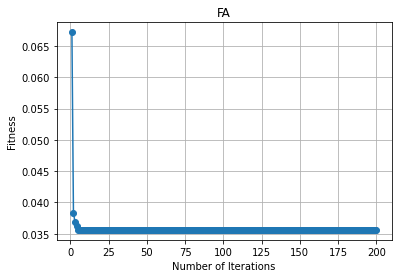

List of possible accuracy: [0.8787878787878788, 0.8787878787878788, 0.9393939393939394, 0.8787878787878788, 0.8484848484848485, 0.9393939393939394, 0.8181818181818182, 0.90625, 0.9375, 0.96875]

Maximum Accuracy That can be obtained from this model is: 96.875 %

Minimum Accuracy: 81.81818181818183 %

Overall Accuracy: 89.94318181818181 %

Standard Deviation is: 0.04710543680201405


In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from fa import jfs   # change this to switch algorithm
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev

# load data
df2 = pd.read_csv('/content/sample_data/demo.csv')
"""data  = data.values
feat  = np.asarray(data[:, 0:-1])
label = np.asarray(data[:, -1])"""
df_all_features=df2.drop(['SNo','ImageName','Emotion'],axis=1)
array_all_features = df_all_features.to_numpy()
mouth_features=['AU_10','AU_12','AU_13','AU_14','AU_15','AU_16','AU_17','AU_18','AU_20','AU_23','AU_24','AU_25','AU_26','AU_27','AU_28']
df_mouth = pd.DataFrame(df_all_features, columns=mouth_features)
array_mouth= df_mouth.to_numpy()
label = df2['Emotion'].values
print(label)


skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
lst_accu_stratified = []

for train_index, test_index in skf.split(array_mouth, label):

# split data into train & validation (70 -- 30)
  x_train_fold, x_test_fold = array_mouth[ train_index ], array_mouth[ test_index ]
  y_train_fold, y_test_fold = label[ train_index ], label[ test_index ]
  fold = {'xt':x_train_fold, 'yt':y_train_fold, 'xv':x_test_fold, 'yv':y_test_fold}

  # parameter
  k    = 15     # k-value in KNN
  N    = 50    # number of particles
  T    = 200  # maximum number of iterations
  opts = {'k':k, 'fold':fold, 'N':N, 'T':T}

  # perform feature selection
  fmdl = jfs(array_mouth, label, opts)
  sf   = fmdl['sf']

  # model with selected features
  num_train = np.size(x_train_fold, 0)
  num_valid = np.size(x_test_fold, 0)
  x_train_fold   = x_train_fold[:, sf]
  y_train_fold  = y_train_fold.reshape(num_train)  # Solve bug
  x_test_fold  = x_test_fold[:, sf]
  y_test_fold   = y_test_fold.reshape(num_valid)  # Solve bug

  mdl       = KNeighborsClassifier(n_neighbors = k)
  mdl.fit(x_train_fold, y_train_fold)

  # accuracy
  y_pred    = mdl.predict(x_test_fold)
  Acc       = np.sum(y_test_fold == y_pred)  / num_valid
  print("Accuracy:", 100 * Acc)
  lst_accu_stratified.append(Acc)

  # number of selected features
  num_feat = fmdl['nf']
  print("Feature Size:", num_feat)
  print("Features:",sf)
  # plot convergence
  curve   = fmdl['c']
  curve   = curve.reshape(np.size(curve,1))
  x       = np.arange(0, opts['T'], 1.0) + 1.0

  fig, ax = plt.subplots()
  ax.plot(x, curve, 'o-')
  ax.set_xlabel('Number of Iterations')
  ax.set_ylabel('Fitness')
  ax.set_title('FA')
  ax.grid()
  plt.show()

print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))


[7 1 5 3 6 7 5 6 3 5 6 4 1 6 2 6 1 4 2 6 5 3 7 2 2 7 5 1 6 3 5 1 7 5 2 6 4
 3 7 5 7 6 3 7 3 3 7 5 7 1 5 6 3 7 7 3 5 1 5 1 6 1 5 7 1 7 3 3 1 5 7 1 7 5
 6 4 5 7 3 7 5 6 3 7 7 5 1 7 1 5 6 5 1 3 5 1 3 7 4 6 1 5 7 1 3 7 3 3 5 1 7
 7 5 1 7 5 3 3 5 7 3 5 7 7 5 3 7 3 5 3 4 5 7 1 5 7 4 7 4 3 1 5 3 5 7 7 3 1
 6 7 5 4 6 3 7 1 5 7 2 4 7 6 7 5 1 7 5 3 5 6 7 2 7 4 3 7 5 1 2 4 1 1 5 3 3
 3 7 4 5 7 6 2 7 5 1 1 4 6 2 2 4 1 2 5 3 4 6 7 2 7 5 2 1 2 6 3 5 7 2 5 1 7
 3 3 6 1 5 7 7 5 3 5 7 1 6 3 7 5 2 6 7 1 3 7 5 6 3 7 7 5 3 4 7 7 3 6 4 7 3
 1 5 7 3 5 7 3 5 7 3 5 7 5 7 3 4 3 5 7 5 4 5 1 7 3 7 4 5 1 5 3 4 7 3 2 5 7
 5 3 7 4 7 4 1 3 5 7 5 3 7 7 1 4 5 1 7 7 1 7 1 3 5 7 3 7 1 3 5]
Generation: 1
Best (FA): 0.18533333333333327
Generation: 2
Best (FA): 0.12666666666666668
Generation: 3
Best (FA): 0.12533333333333332
Generation: 4
Best (FA): 0.12533333333333332
Generation: 5
Best (FA): 0.12466666666666666
Generation: 6
Best (FA): 0.12466666666666666
Generation: 7
Best (FA): 0.12466666666666666
Generation: 8
Best (F

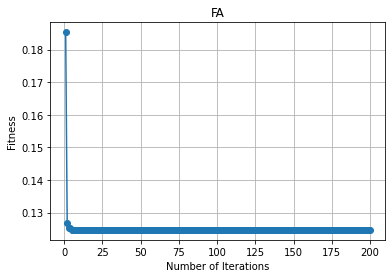

Generation: 1
Best (FA): 0.126
Generation: 2
Best (FA): 0.12533333333333332
Generation: 3
Best (FA): 0.12466666666666666
Generation: 4
Best (FA): 0.12466666666666666
Generation: 5
Best (FA): 0.12466666666666666
Generation: 6
Best (FA): 0.12466666666666666
Generation: 7
Best (FA): 0.12466666666666666
Generation: 8
Best (FA): 0.124
Generation: 9
Best (FA): 0.124
Generation: 10
Best (FA): 0.124
Generation: 11
Best (FA): 0.124
Generation: 12
Best (FA): 0.124
Generation: 13
Best (FA): 0.12333333333333334
Generation: 14
Best (FA): 0.12333333333333334
Generation: 15
Best (FA): 0.12333333333333334
Generation: 16
Best (FA): 0.12333333333333334
Generation: 17
Best (FA): 0.12333333333333334
Generation: 18
Best (FA): 0.12333333333333334
Generation: 19
Best (FA): 0.12333333333333334
Generation: 20
Best (FA): 0.12333333333333334
Generation: 21
Best (FA): 0.12333333333333334
Generation: 22
Best (FA): 0.12333333333333334
Generation: 23
Best (FA): 0.12333333333333334
Generation: 24
Best (FA): 0.1233333

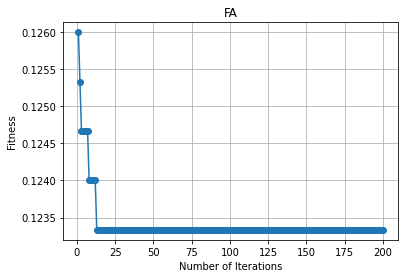

Generation: 1
Best (FA): 0.09733333333333337
Generation: 2
Best (FA): 0.06533333333333328
Generation: 3
Best (FA): 0.06533333333333328
Generation: 4
Best (FA): 0.06533333333333328
Generation: 5
Best (FA): 0.06533333333333328
Generation: 6
Best (FA): 0.06533333333333328
Generation: 7
Best (FA): 0.06533333333333328
Generation: 9
Best (FA): 0.06533333333333328
Generation: 10
Best (FA): 0.06466666666666662
Generation: 11
Best (FA): 0.06466666666666662
Generation: 12
Best (FA): 0.06466666666666662
Generation: 13
Best (FA): 0.06466666666666662
Generation: 14
Best (FA): 0.06466666666666662
Generation: 15
Best (FA): 0.06466666666666662
Generation: 16
Best (FA): 0.06466666666666662
Generation: 17
Best (FA): 0.06466666666666662
Generation: 18
Best (FA): 0.06466666666666662
Generation: 19
Best (FA): 0.06466666666666662
Generation: 20
Best (FA): 0.06466666666666662
Generation: 21
Best (FA): 0.06466666666666662
Generation: 22
Best (FA): 0.06466666666666662
Generation: 23
Best (FA): 0.06466666666666

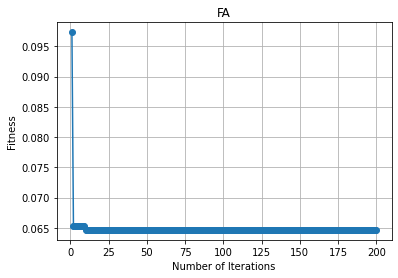

Generation: 1
Best (FA): 0.2166666666666667
Generation: 2
Best (FA): 0.126
Generation: 3
Best (FA): 0.126
Generation: 4
Best (FA): 0.126
Generation: 5
Best (FA): 0.12533333333333332
Generation: 6
Best (FA): 0.12533333333333332
Generation: 7
Best (FA): 0.12533333333333332
Generation: 8
Best (FA): 0.12533333333333332
Generation: 9
Best (FA): 0.12533333333333332
Generation: 10
Best (FA): 0.12533333333333332
Generation: 11
Best (FA): 0.12466666666666666
Generation: 12
Best (FA): 0.12466666666666666
Generation: 13
Best (FA): 0.12466666666666666
Generation: 14
Best (FA): 0.12466666666666666
Generation: 15
Best (FA): 0.12466666666666666
Generation: 16
Best (FA): 0.12466666666666666
Generation: 17
Best (FA): 0.12466666666666666
Generation: 18
Best (FA): 0.12466666666666666
Generation: 19
Best (FA): 0.12466666666666666
Generation: 20
Best (FA): 0.12466666666666666
Generation: 21
Best (FA): 0.12466666666666666
Generation: 22
Best (FA): 0.12466666666666666
Generation: 23
Best (FA): 0.124666666666

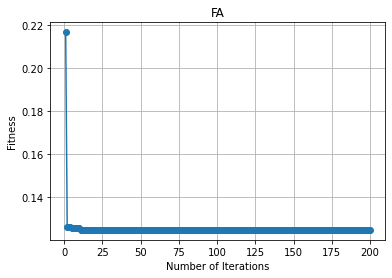

Generation: 1
Best (FA): 0.15466666666666665
Generation: 2
Best (FA): 0.1533333333333333
Generation: 3
Best (FA): 0.15266666666666664
Generation: 4
Best (FA): 0.15266666666666664
Generation: 5
Best (FA): 0.15266666666666664
Generation: 6
Best (FA): 0.15266666666666664
Generation: 7
Best (FA): 0.15266666666666664
Generation: 8
Best (FA): 0.15266666666666664
Generation: 9
Best (FA): 0.15266666666666664
Generation: 10
Best (FA): 0.15266666666666664
Generation: 11
Best (FA): 0.15266666666666664
Generation: 12
Best (FA): 0.15266666666666664
Generation: 13
Best (FA): 0.15266666666666664
Generation: 14
Best (FA): 0.15266666666666664
Generation: 15
Best (FA): 0.15266666666666664
Generation: 16
Best (FA): 0.15266666666666664
Generation: 17
Best (FA): 0.15266666666666664
Generation: 18
Best (FA): 0.15266666666666664
Generation: 19
Best (FA): 0.15266666666666664
Generation: 20
Best (FA): 0.15266666666666664
Generation: 21
Best (FA): 0.15266666666666664
Generation: 22
Best (FA): 0.1526666666666666

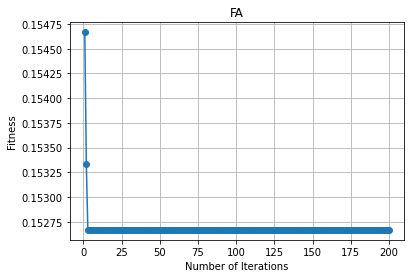

Generation: 1
Best (FA): 0.128
Generation: 2
Best (FA): 0.06599999999999995
Generation: 3
Best (FA): 0.06533333333333328
Generation: 4
Best (FA): 0.06533333333333328
Generation: 5
Best (FA): 0.06533333333333328
Generation: 6
Best (FA): 0.06466666666666662
Generation: 7
Best (FA): 0.06466666666666662
Generation: 8
Best (FA): 0.06466666666666662
Generation: 9
Best (FA): 0.06466666666666662
Generation: 10
Best (FA): 0.06466666666666662
Generation: 11
Best (FA): 0.06466666666666662
Generation: 12
Best (FA): 0.06466666666666662
Generation: 13
Best (FA): 0.06466666666666662
Generation: 14
Best (FA): 0.06466666666666662
Generation: 15
Best (FA): 0.06466666666666662
Generation: 16
Best (FA): 0.06466666666666662
Generation: 17
Best (FA): 0.06466666666666662
Generation: 18
Best (FA): 0.06466666666666662
Generation: 19
Best (FA): 0.06466666666666662
Generation: 20
Best (FA): 0.06466666666666662
Generation: 21
Best (FA): 0.06466666666666662
Generation: 22
Best (FA): 0.06466666666666662
Generation:

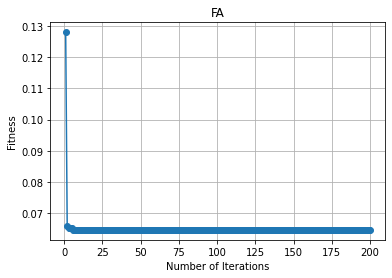

Generation: 1
Best (FA): 0.24533333333333332
Generation: 2
Best (FA): 0.18466666666666662
Generation: 3
Best (FA): 0.18466666666666662
Generation: 4
Best (FA): 0.18466666666666662
Generation: 5
Best (FA): 0.18466666666666662
Generation: 6
Best (FA): 0.18466666666666662
Generation: 7
Best (FA): 0.18466666666666662
Generation: 8
Best (FA): 0.18466666666666662
Generation: 9
Best (FA): 0.18466666666666662
Generation: 10
Best (FA): 0.18399999999999994
Generation: 11
Best (FA): 0.18399999999999994
Generation: 12
Best (FA): 0.18399999999999994
Generation: 13
Best (FA): 0.18399999999999994
Generation: 14
Best (FA): 0.18399999999999994
Generation: 15
Best (FA): 0.18399999999999994
Generation: 16
Best (FA): 0.18399999999999994
Generation: 17
Best (FA): 0.18399999999999994
Generation: 18
Best (FA): 0.18399999999999994
Generation: 19
Best (FA): 0.18399999999999994
Generation: 20
Best (FA): 0.18399999999999994
Generation: 21
Best (FA): 0.18399999999999994
Generation: 22
Best (FA): 0.183999999999999

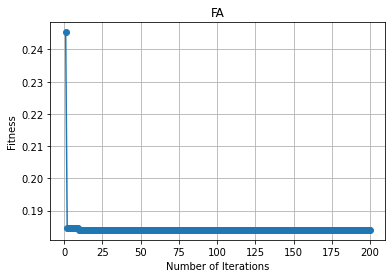

Generation: 1
Best (FA): 0.13175
Generation: 2
Best (FA): 0.0988125
Generation: 3
Best (FA): 0.0988125
Generation: 4
Best (FA): 0.0988125
Generation: 5
Best (FA): 0.0988125
Generation: 6
Best (FA): 0.0988125
Generation: 7
Best (FA): 0.0988125
Generation: 8
Best (FA): 0.09814583333333333
Generation: 9
Best (FA): 0.09814583333333333
Generation: 10
Best (FA): 0.09814583333333333
Generation: 11
Best (FA): 0.09814583333333333
Generation: 12
Best (FA): 0.09814583333333333
Generation: 13
Best (FA): 0.09814583333333333
Generation: 14
Best (FA): 0.09814583333333333
Generation: 15
Best (FA): 0.09814583333333333
Generation: 16
Best (FA): 0.09814583333333333
Generation: 17
Best (FA): 0.09814583333333333
Generation: 18
Best (FA): 0.09814583333333333
Generation: 19
Best (FA): 0.09814583333333333
Generation: 20
Best (FA): 0.09814583333333333
Generation: 21
Best (FA): 0.09814583333333333
Generation: 22
Best (FA): 0.09814583333333333
Generation: 23
Best (FA): 0.09814583333333333
Generation: 24
Best (FA

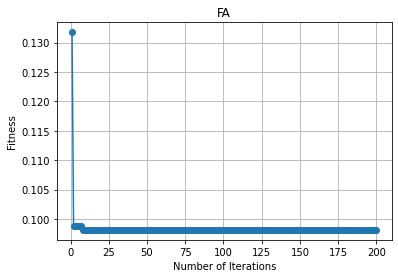

Generation: 1
Best (FA): 0.09747916666666666
Generation: 2
Best (FA): 0.06720833333333334
Generation: 3
Best (FA): 0.06720833333333334
Generation: 4
Best (FA): 0.06720833333333334
Generation: 5
Best (FA): 0.06654166666666667
Generation: 6
Best (FA): 0.065875
Generation: 7
Best (FA): 0.065875
Generation: 8
Best (FA): 0.065875
Generation: 9
Best (FA): 0.065875
Generation: 10
Best (FA): 0.065875
Generation: 11
Best (FA): 0.065875
Generation: 12
Best (FA): 0.065875
Generation: 13
Best (FA): 0.065875
Generation: 14
Best (FA): 0.06520833333333334
Generation: 15
Best (FA): 0.06520833333333334
Generation: 16
Best (FA): 0.06520833333333334
Generation: 17
Best (FA): 0.06520833333333334
Generation: 18
Best (FA): 0.06520833333333334
Generation: 19
Best (FA): 0.06520833333333334
Generation: 20
Best (FA): 0.06520833333333334
Generation: 21
Best (FA): 0.06520833333333334
Generation: 22
Best (FA): 0.06520833333333334
Generation: 23
Best (FA): 0.06520833333333334
Generation: 24
Best (FA): 0.06520833333

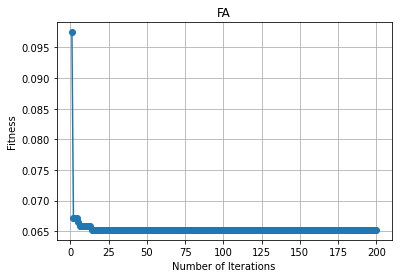

Generation: 1
Best (FA): 0.12975
Generation: 2
Best (FA): 0.06720833333333334
Generation: 3
Best (FA): 0.036270833333333335
Generation: 4
Best (FA): 0.036270833333333335
Generation: 5
Best (FA): 0.036270833333333335
Generation: 6
Best (FA): 0.03560416666666667
Generation: 7
Best (FA): 0.03560416666666667
Generation: 9
Best (FA): 0.03560416666666667
Generation: 10
Best (FA): 0.03560416666666667
Generation: 11
Best (FA): 0.03560416666666667
Generation: 12
Best (FA): 0.03560416666666667
Generation: 13
Best (FA): 0.03560416666666667
Generation: 14
Best (FA): 0.03560416666666667
Generation: 15
Best (FA): 0.03560416666666667
Generation: 16
Best (FA): 0.03560416666666667
Generation: 17
Best (FA): 0.03560416666666667
Generation: 18
Best (FA): 0.03560416666666667
Generation: 19
Best (FA): 0.03560416666666667
Generation: 20
Best (FA): 0.03560416666666667
Generation: 21
Best (FA): 0.03560416666666667
Generation: 22
Best (FA): 0.03560416666666667
Generation: 23
Best (FA): 0.03560416666666667
Gener

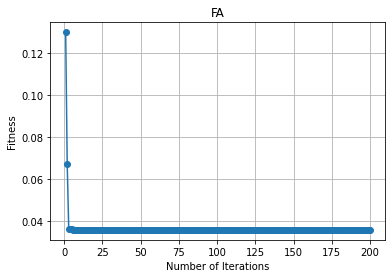

List of possible accuracy: [0.8787878787878788, 0.8787878787878788, 0.9393939393939394, 0.8787878787878788, 0.8484848484848485, 0.9393939393939394, 0.8181818181818182, 0.90625, 0.9375, 0.96875]

Maximum Accuracy That can be obtained from this model is: 96.875 %

Minimum Accuracy: 81.81818181818183 %

Overall Accuracy: 89.94318181818181 %

Standard Deviation is: 0.04710543680201405


In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from fa import jfs   # change this to switch algorithm
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from statistics import mean, stdev

# load data
df2 = pd.read_csv('/content/sample_data/demo.csv')
"""data  = data.values
feat  = np.asarray(data[:, 0:-1])
label = np.asarray(data[:, -1])"""
df_all_features=df2.drop(['SNo','ImageName','Emotion'],axis=1)
array_all_features = df_all_features.to_numpy()
mouth_features=['AU_10','AU_12','AU_13','AU_14','AU_15','AU_16','AU_17','AU_18','AU_20','AU_23','AU_24','AU_25','AU_26','AU_27','AU_28']
df_mouth = pd.DataFrame(df_all_features, columns=mouth_features)
array_mouth= df_mouth.to_numpy()
label = df2['Emotion'].values
print(label)


skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
lst_accu_stratified = []

for train_index, test_index in skf.split(array_mouth, label):

# split data into train & validation (70 -- 30)
  x_train_fold, x_test_fold = array_mouth[ train_index ], array_mouth[ test_index ]
  y_train_fold, y_test_fold = label[ train_index ], label[ test_index ]
  fold = {'xt':x_train_fold, 'yt':y_train_fold, 'xv':x_test_fold, 'yv':y_test_fold}

  # parameter
  k    = 15     # k-value in KNN
  N    = 60    # number of particles
  T    = 200  # maximum number of iterations
  opts = {'k':k, 'fold':fold, 'N':N, 'T':T}

  # perform feature selection
  fmdl = jfs(array_mouth, label, opts)
  sf   = fmdl['sf']

  # model with selected features
  num_train = np.size(x_train_fold, 0)
  num_valid = np.size(x_test_fold, 0)
  x_train_fold   = x_train_fold[:, sf]
  y_train_fold  = y_train_fold.reshape(num_train)  # Solve bug
  x_test_fold  = x_test_fold[:, sf]
  y_test_fold   = y_test_fold.reshape(num_valid)  # Solve bug

  mdl       = KNeighborsClassifier(n_neighbors = k)
  mdl.fit(x_train_fold, y_train_fold)

  # accuracy
  y_pred    = mdl.predict(x_test_fold)
  Acc       = np.sum(y_test_fold == y_pred)  / num_valid
  print("Accuracy:", 100 * Acc)
  lst_accu_stratified.append(Acc)

  # number of selected features
  num_feat = fmdl['nf']
  print("Feature Size:", num_feat)
  print("Features:",sf)
  # plot convergence
  curve   = fmdl['c']
  curve   = curve.reshape(np.size(curve,1))
  x       = np.arange(0, opts['T'], 1.0) + 1.0

  fig, ax = plt.subplots()
  ax.plot(x, curve, 'o-')
  ax.set_xlabel('Number of Iterations')
  ax.set_ylabel('Fitness')
  ax.set_title('FA')
  ax.grid()
  plt.show()

print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))


**Selected Features**


In [ ]:
firefly_face=['AU_1','AU_6','AU_9','AU_12','AU_14','AU_15','AU_16','AU_17','AU_20','AU_23','AU_24','AU_25','AU_27','AU_43'] #chose the ones which appeared in 4 or more splits
firefly_mouth=['AU_12','AU_14','AU_15','AU_20','AU_23','AU_24','AU_25','AU_27'] #>=4/10
cuckoo_face=['AU_1','AU_5','AU_9','AU_12','AU_14','AU_20','AU_23','AU_24','AU_25'] #>=4/10
cuckoo_mouth=['AU_12','AU_14','AU_15','AU_20','AU_23','AU_24','AU_25','AU_27']#>=4/10
pso_face=['AU_1','AU_4','AU_9','AU_10','AU_12','AU_14','AU_15','AU_20','AU_23','AU_24','AU_25','AU_28','AU_45','AU_62'] #>=4/10
pso_mouth= ['AU_12','AU_14','AU_15','AU_20','AU_23','AU_24','AU_26','AU_27']#=4/10
eyes=['AU_5','AU_7','AU_43','AU_45','AU_62','AU_63','AU_64']


**Random Forest**

In [ ]:
df2  = pd.read_csv('/content/sample_data/demo.csv')
df3=df2.drop(['SNo','ImageName','Emotion'],axis=1)
label = df2['Emotion'].values

In [ ]:
#RF1
# RandomForest--firefly_face--firefly_mouth
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics

random_seed = 42

for i in range(5):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  train_face = X_train[firefly_face].copy()
  test_face= X_test[firefly_face].copy()

  train_mouth= X_train[firefly_mouth].copy()
  test_mouth= X_test[firefly_mouth].copy()

  train_eyes= X_train[eyes].copy()
  test_eyes= X_test[eyes].copy()

  clf1 = RandomForestClassifier(random_state=0)
  # fit the classifier on the training data
  clf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = clf1.predict(test_face)

  clf2 = RandomForestClassifier( random_state=0)
  clf2.fit(train_mouth, y_train)
  y_pred_mouth= clf2.predict(test_mouth)

  clf3 = RandomForestClassifier(random_state=0)
  clf3.fit(train_eyes, y_train)

  y_pred_eyes= clf3.predict(test_eyes)
  #print(y_pred_eyes)
  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  #print(y_pred_face)
  #print(y_pred_mouth)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


[5, 7, -1, 5, 3, 1, 3, 2, 3, 5, 1, 4, 3, 3, 5, 3, 3, 7, 7, 7, 3, 4, 7, 7, 5, 3, 7, 5, 7, 7, 5, 7, 3, 1, 3, 7, 3, 5, 5, 3, 5, 3, 7, 4, 3, 5, 7, 7, 2, 1, 7, 6, 1, 5, 3, 7, 1, 5, -1, 5, 1, 7, -1, 5, 7, 7]
Accuracy by Majority Vote: 0.9545454545454546
Accuracies for face,mouth,eyes respectively: 0.9545454545454546 0.9242424242424242 0.6515151515151515
[5, 3, 4, 3, 6, 5, 5, 3, 7, 3, 5, 3, 7, -1, 7, 5, 4, 7, 5, 3, 5, 5, 4, 5, 1, 7, 1, 1, 5, 5, 3, 7, 6, 4, 3, 3, 1, 1, 4, 5, -1, 3, 1, 6, 5, 1, 5, 4, 7, -1, 7, 5, 5, 7, 5, 7, 7, 3, 1, 1, 7, 4, 3, 6, 5, -1]
Accuracy by Majority Vote: 0.9393939393939394
Accuracies for face,mouth,eyes respectively: 0.9696969696969697 0.8787878787878788 0.5909090909090909
[6, 4, 7, 5, -1, 5, 7, 7, 7, 3, 5, 3, 1, 7, 7, 4, 3, 5, 2, 5, 1, 2, 5, 5, 7, 7, 1, 5, 7, 7, 7, 7, 7, 5, 5, 7, 2, 3, 1, 7, 1, 3, -1, 7, 7, 1, 3, 5, 6, 5, 3, 7, 7, 5, 7, 1, 5, 5, 7, 1, 5, 7, 3, 3, 7, 5]
Accuracy by Majority Vote: 0.9696969696969697
Accuracies for face,mouth,eyes respectively: 0.95454

In [ ]:
#RF2
# RandomForest--firefly_face--pso_mouth
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics

random_seed = 42

for i in range(5):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  train_face = X_train[firefly_face].copy()
  test_face= X_test[firefly_face].copy()

  train_mouth= X_train[pso_mouth].copy()
  test_mouth= X_test[pso_mouth].copy()

  train_eyes= X_train[eyes].copy()
  test_eyes= X_test[eyes].copy()

  clf1 = RandomForestClassifier(random_state=0)
  # fit the classifier on the training data
  clf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = clf1.predict(test_face)

  clf2 = RandomForestClassifier( random_state=0)
  clf2.fit(train_mouth, y_train)
  y_pred_mouth= clf2.predict(test_mouth)

  clf3 = RandomForestClassifier(random_state=0)
  clf3.fit(train_eyes, y_train)

  y_pred_eyes= clf3.predict(test_eyes)
  #print(y_pred_eyes)
  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  #print(y_pred_face)
  #print(y_pred_mouth)

  y_pred_majority=[]

  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  #print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


Accuracy by Majority Vote: 0.9545454545454546
Accuracies for face,mouth,eyes respectively: 0.9545454545454546 0.9393939393939394 0.6515151515151515
Accuracy by Majority Vote: 0.9545454545454546
Accuracies for face,mouth,eyes respectively: 0.9696969696969697 0.9090909090909091 0.5909090909090909
Accuracy by Majority Vote: 0.9696969696969697
Accuracies for face,mouth,eyes respectively: 0.9545454545454546 0.9242424242424242 0.5757575757575758
Accuracy by Majority Vote: 0.9393939393939394
Accuracies for face,mouth,eyes respectively: 0.9545454545454546 0.9242424242424242 0.5606060606060606
Accuracy by Majority Vote: 0.9393939393939394
Accuracies for face,mouth,eyes respectively: 0.9696969696969697 0.9090909090909091 0.5303030303030303


In [ ]:
#RF3
# RandomForest--firefly_face--cuckoo_mouth
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics

random_seed = 42

for i in range(5):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  train_face = X_train[firefly_face].copy()
  test_face= X_test[firefly_face].copy()

  train_mouth= X_train[cuckoo_mouth].copy()
  test_mouth= X_test[cuckoo_mouth].copy()

  train_eyes= X_train[eyes].copy()
  test_eyes= X_test[eyes].copy()

  clf1 = RandomForestClassifier(random_state=0)
  # fit the classifier on the training data
  clf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = clf1.predict(test_face)

  clf2 = RandomForestClassifier( random_state=0)
  clf2.fit(train_mouth, y_train)
  y_pred_mouth= clf2.predict(test_mouth)

  clf3 = RandomForestClassifier(random_state=0)
  clf3.fit(train_eyes, y_train)

  y_pred_eyes= clf3.predict(test_eyes)
  #print(y_pred_eyes)
  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  #print(y_pred_face)
  #print(y_pred_mouth)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  #print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


Accuracy by Majority Vote: 0.9545454545454546
Accuracies for face,mouth,eyes respectively: 0.9545454545454546 0.9242424242424242 0.6515151515151515
Accuracy by Majority Vote: 0.9393939393939394
Accuracies for face,mouth,eyes respectively: 0.9696969696969697 0.8787878787878788 0.5909090909090909
Accuracy by Majority Vote: 0.9696969696969697
Accuracies for face,mouth,eyes respectively: 0.9545454545454546 0.9242424242424242 0.5757575757575758
Accuracy by Majority Vote: 0.9242424242424242
Accuracies for face,mouth,eyes respectively: 0.9545454545454546 0.9090909090909091 0.5606060606060606
Accuracy by Majority Vote: 0.9242424242424242
Accuracies for face,mouth,eyes respectively: 0.9696969696969697 0.8787878787878788 0.5303030303030303


In [ ]:
#RF4
# RandomForest--cuckoo_face--cuckoo_mouth
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics

random_seed = 42

for i in range(5):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  train_face = X_train[cuckoo_face].copy()
  test_face= X_test[cuckoo_face].copy()

  train_mouth= X_train[cuckoo_mouth].copy()
  test_mouth= X_test[cuckoo_mouth].copy()

  train_eyes= X_train[eyes].copy()
  test_eyes= X_test[eyes].copy()

  clf1 = RandomForestClassifier(random_state=0)
  # fit the classifier on the training data
  clf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = clf1.predict(test_face)

  clf2 = RandomForestClassifier( random_state=0)
  clf2.fit(train_mouth, y_train)
  y_pred_mouth= clf2.predict(test_mouth)

  clf3 = RandomForestClassifier(random_state=0)
  clf3.fit(train_eyes, y_train)

  y_pred_eyes= clf3.predict(test_eyes)
  #print(y_pred_eyes)
  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  #print(y_pred_face)
  #print(y_pred_mouth)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  #print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


Accuracy by Majority Vote: 0.9242424242424242
Accuracies for face,mouth,eyes respectively: 0.9545454545454546 0.9242424242424242 0.6515151515151515
Accuracy by Majority Vote: 0.9242424242424242
Accuracies for face,mouth,eyes respectively: 0.9393939393939394 0.8787878787878788 0.5909090909090909
Accuracy by Majority Vote: 0.9393939393939394
Accuracies for face,mouth,eyes respectively: 0.9545454545454546 0.9242424242424242 0.5757575757575758
Accuracy by Majority Vote: 0.8939393939393939
Accuracies for face,mouth,eyes respectively: 0.9393939393939394 0.9090909090909091 0.5606060606060606
Accuracy by Majority Vote: 0.8939393939393939
Accuracies for face,mouth,eyes respectively: 0.9696969696969697 0.8787878787878788 0.5303030303030303


In [ ]:
#RF5
# RandomForest--cuckoo_face--firefly_mouth
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics

random_seed = 42

for i in range(5):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  train_face = X_train[cuckoo_face].copy()
  test_face= X_test[cuckoo_face].copy()

  train_mouth= X_train[firefly_mouth].copy()
  test_mouth= X_test[firefly_mouth].copy()

  train_eyes= X_train[eyes].copy()
  test_eyes= X_test[eyes].copy()

  cl1 = RandomForestClassifier(random_state=0)
  # fit the classifier on the training data
  cl1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = cl1.predict(test_face)

  clf2 = RandomForestClassifier( random_state=0)
  clf2.fit(train_mouth, y_train)
  y_pred_mouth= clf2.predict(test_mouth)

  clf3 = RandomForestClassifier(random_state=0)
  clf3.fit(train_eyes, y_train)

  y_pred_eyes= clf3.predict(test_eyes)
  #print(y_pred_eyes)
  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  #print(y_pred_face)
  #print(y_pred_mouth)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  #print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


Accuracy by Majority Vote: 0.9242424242424242
Accuracies for face,mouth,eyes respectively: 0.9545454545454546 0.9242424242424242 0.6515151515151515
Accuracy by Majority Vote: 0.9242424242424242
Accuracies for face,mouth,eyes respectively: 0.9393939393939394 0.8787878787878788 0.5909090909090909
Accuracy by Majority Vote: 0.9393939393939394
Accuracies for face,mouth,eyes respectively: 0.9545454545454546 0.9242424242424242 0.5757575757575758
Accuracy by Majority Vote: 0.8939393939393939
Accuracies for face,mouth,eyes respectively: 0.9393939393939394 0.9090909090909091 0.5606060606060606
Accuracy by Majority Vote: 0.8939393939393939
Accuracies for face,mouth,eyes respectively: 0.9696969696969697 0.8787878787878788 0.5303030303030303


In [ ]:
#RF6
# RandomForest--cuckoo_face--pso_mouth
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics

random_seed = 42

for i in range(5):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  train_face = X_train[cuckoo_face].copy()
  test_face= X_test[cuckoo_face].copy()

  train_mouth= X_train[pso_mouth].copy()
  test_mouth= X_test[pso_mouth].copy()

  train_eyes= X_train[eyes].copy()
  test_eyes= X_test[eyes].copy()

  clf1 = RandomForestClassifier(random_state=0)
  # fit the classifier on the training data
  clf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = clf1.predict(test_face)

  clf2 = RandomForestClassifier( random_state=0)
  clf2.fit(train_mouth, y_train)
  y_pred_mouth= clf2.predict(test_mouth)

  clf3 = RandomForestClassifier(random_state=0)
  clf3.fit(train_eyes, y_train)

  y_pred_eyes= clf3.predict(test_eyes)
  #print(y_pred_eyes)
  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  #print(y_pred_face)
  #print(y_pred_mouth)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  #print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


Accuracy by Majority Vote: 0.9242424242424242
Accuracies for face,mouth,eyes respectively: 0.9545454545454546 0.9393939393939394 0.6515151515151515
Accuracy by Majority Vote: 0.9242424242424242
Accuracies for face,mouth,eyes respectively: 0.9393939393939394 0.9090909090909091 0.5909090909090909
Accuracy by Majority Vote: 0.9393939393939394
Accuracies for face,mouth,eyes respectively: 0.9545454545454546 0.9242424242424242 0.5757575757575758
Accuracy by Majority Vote: 0.9090909090909091
Accuracies for face,mouth,eyes respectively: 0.9393939393939394 0.9242424242424242 0.5606060606060606
Accuracy by Majority Vote: 0.9090909090909091
Accuracies for face,mouth,eyes respectively: 0.9696969696969697 0.9090909090909091 0.5303030303030303


In [ ]:
#RF7
# RandomForest--pso_face--pso_mouth
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics

random_seed = 42

for i in range(5):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  train_face = X_train[pso_face].copy()
  test_face= X_test[pso_face].copy()

  train_mouth= X_train[pso_mouth].copy()
  test_mouth= X_test[pso_mouth].copy()

  train_eyes= X_train[eyes].copy()
  test_eyes= X_test[eyes].copy()

  clf1 = RandomForestClassifier(random_state=0)
  # fit the classifier on the training data
  clf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = clf1.predict(test_face)

  clf2 = RandomForestClassifier( random_state=0)
  clf2.fit(train_mouth, y_train)
  y_pred_mouth= clf2.predict(test_mouth)

  clf3 = RandomForestClassifier(random_state=0)
  clf3.fit(train_eyes, y_train)

  y_pred_eyes= clf3.predict(test_eyes)
  #print(y_pred_eyes)
  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  #print(y_pred_face)
  #print(y_pred_mouth)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  #print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


Accuracy by Majority Vote: 0.8787878787878788
Accuracies for face,mouth,eyes respectively: 0.9393939393939394 0.9393939393939394 0.6515151515151515
Accuracy by Majority Vote: 0.8939393939393939
Accuracies for face,mouth,eyes respectively: 0.9242424242424242 0.9090909090909091 0.5909090909090909
Accuracy by Majority Vote: 0.9545454545454546
Accuracies for face,mouth,eyes respectively: 0.9696969696969697 0.9242424242424242 0.5757575757575758
Accuracy by Majority Vote: 0.9090909090909091
Accuracies for face,mouth,eyes respectively: 0.9393939393939394 0.9242424242424242 0.5606060606060606
Accuracy by Majority Vote: 0.8787878787878788
Accuracies for face,mouth,eyes respectively: 0.9545454545454546 0.9090909090909091 0.5303030303030303


In [ ]:
# RF8
# RandomForest--pso_face--firefly_mouth
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics

random_seed = 42

for i in range(5):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  train_face = X_train[pso_face].copy()
  test_face= X_test[pso_face].copy()

  train_mouth= X_train[firefly_mouth].copy()
  test_mouth= X_test[firefly_mouth].copy()

  train_eyes= X_train[eyes].copy()
  test_eyes= X_test[eyes].copy()

  clf1 = RandomForestClassifier(random_state=0)
  # fit the classifier on the training data
  clf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = clf1.predict(test_face)

  clf2 = RandomForestClassifier( random_state=0)
  clf2.fit(train_mouth, y_train)
  y_pred_mouth= clf2.predict(test_mouth)

  clf3 = RandomForestClassifier(random_state=0)
  clf3.fit(train_eyes, y_train)

  y_pred_eyes= clf3.predict(test_eyes)
  #print(y_pred_eyes)
  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  #print(y_pred_face)
  #print(y_pred_mouth)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  #print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


Accuracy by Majority Vote: 0.8787878787878788
Accuracies for face,mouth,eyes respectively: 0.9393939393939394 0.9242424242424242 0.6515151515151515
Accuracy by Majority Vote: 0.8939393939393939
Accuracies for face,mouth,eyes respectively: 0.9242424242424242 0.8787878787878788 0.5909090909090909
Accuracy by Majority Vote: 0.9545454545454546
Accuracies for face,mouth,eyes respectively: 0.9696969696969697 0.9242424242424242 0.5757575757575758
Accuracy by Majority Vote: 0.9090909090909091
Accuracies for face,mouth,eyes respectively: 0.9393939393939394 0.9090909090909091 0.5606060606060606
Accuracy by Majority Vote: 0.8787878787878788
Accuracies for face,mouth,eyes respectively: 0.9545454545454546 0.8787878787878788 0.5303030303030303


In [ ]:
#RF9
# RandomForest--pso_face--cuckoo_mouth
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics

random_seed = 42

for i in range(5):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  train_face = X_train[pso_face].copy()
  test_face= X_test[pso_face].copy()

  train_mouth= X_train[cuckoo_mouth].copy()
  test_mouth= X_test[cuckoo_mouth].copy()

  train_eyes= X_train[eyes].copy()
  test_eyes= X_test[eyes].copy()

  clf1 = RandomForestClassifier(random_state=0)
  # fit the classifier on the training data
  clf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = clf1.predict(test_face)

  clf2 = RandomForestClassifier( random_state=0)
  clf2.fit(train_mouth, y_train)
  y_pred_mouth= clf2.predict(test_mouth)

  clf3 = RandomForestClassifier(random_state=0)
  clf3.fit(train_eyes, y_train)

  y_pred_eyes= clf3.predict(test_eyes)
  #print(y_pred_eyes)
  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  #print(y_pred_face)
  #print(y_pred_mouth)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  #print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


Accuracy by Majority Vote: 0.8787878787878788
Accuracies for face,mouth,eyes respectively: 0.9393939393939394 0.9242424242424242 0.6515151515151515
Accuracy by Majority Vote: 0.8939393939393939
Accuracies for face,mouth,eyes respectively: 0.9242424242424242 0.8787878787878788 0.5909090909090909
Accuracy by Majority Vote: 0.9545454545454546
Accuracies for face,mouth,eyes respectively: 0.9696969696969697 0.9242424242424242 0.5757575757575758
Accuracy by Majority Vote: 0.9090909090909091
Accuracies for face,mouth,eyes respectively: 0.9393939393939394 0.9090909090909091 0.5606060606060606
Accuracy by Majority Vote: 0.8787878787878788
Accuracies for face,mouth,eyes respectively: 0.9545454545454546 0.8787878787878788 0.5303030303030303


SVM

In [ ]:
#SVM1
#SVM--firefly_face--firefly_mouth
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics

random_seed = 42

for i in range(5):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  train_face = X_train[firefly_face].copy()
  test_face= X_test[firefly_face].copy()

  train_mouth= X_train[firefly_mouth].copy()
  test_mouth= X_test[firefly_mouth].copy()

  train_eyes= X_train[eyes].copy()
  test_eyes= X_test[eyes].copy()

  clf1 = SVC(random_state=0)
  # fit the classifier on the training data
  clf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = clf1.predict(test_face)

  clf2 = SVC(random_state=0)
  clf2.fit(train_mouth, y_train)
  y_pred_mouth= clf2.predict(test_mouth)

  clf3 = SVC(random_state=0)
  clf3.fit(train_eyes, y_train)

  y_pred_eyes= clf3.predict(test_eyes)
  #print(y_pred_eyes)
  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  #print(y_pred_face)
  #print(y_pred_mouth)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


[5, 7, 5, 5, 3, 1, 5, 2, 3, 5, 1, 4, 3, 3, 5, 5, 3, 7, 7, 7, 3, 7, 7, 7, 5, 3, 7, 5, 7, 7, 5, 7, 3, 1, 3, 7, 3, 5, 5, 3, 5, -1, 7, 4, 3, 5, 7, 7, -1, 1, 7, 6, 1, 5, 3, 7, 1, 5, 5, 5, 1, 7, -1, 5, 7, 7]
Accuracy by Majority Vote: 0.9545454545454546
Accuracies for face,mouth,eyes respectively: 0.8787878787878788 0.8939393939393939 0.6363636363636364
[5, 3, 4, 3, -1, 5, 5, 5, 7, 3, 5, 3, 7, -1, 7, 5, -1, 7, 5, 3, 5, 5, 5, 5, 1, 7, -1, 1, 5, 5, 3, 7, 6, 4, 3, 3, 1, 1, 4, 5, -1, 3, 1, 6, 5, 1, 5, 7, 7, -1, 7, 5, 5, 7, 4, 7, 7, 3, 1, 1, 7, 4, 3, 6, 5, 1]
Accuracy by Majority Vote: 0.9090909090909091
Accuracies for face,mouth,eyes respectively: 0.9090909090909091 0.8484848484848485 0.5454545454545454
[6, 4, 7, 5, -1, 5, 7, 7, 5, 3, 5, -1, 1, 7, 7, 4, 3, 5, -1, 5, 1, 2, 5, 5, 7, 7, -1, 5, 7, 7, 7, 7, 7, 5, 5, 7, -1, 3, 1, 7, 1, 3, 3, -1, 7, 1, 5, 5, 6, 5, 3, 7, 7, 5, 7, -1, 5, 5, 7, -1, 5, 7, 3, 3, 7, 5]
Accuracy by Majority Vote: 0.8636363636363636
Accuracies for face,mouth,eyes respectively:

In [ ]:
#SVM2
#SVM--firefly_face--pso_mouth
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics

random_seed = 42

for i in range(5):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  train_face = X_train[firefly_face].copy()
  test_face= X_test[firefly_face].copy()

  train_mouth= X_train[pso_mouth].copy()
  test_mouth= X_test[pso_mouth].copy()

  train_eyes= X_train[eyes].copy()
  test_eyes= X_test[eyes].copy()

  clf1 = SVC(random_state=0)
  # fit the classifier on the training data
  clf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = clf1.predict(test_face)

  clf2 = SVC(random_state=0)
  clf2.fit(train_mouth, y_train)
  y_pred_mouth= clf2.predict(test_mouth)

  clf3 = SVC(random_state=0)
  clf3.fit(train_eyes, y_train)

  y_pred_eyes= clf3.predict(test_eyes)
  #print(y_pred_eyes)
  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  #print(y_pred_face)
  #print(y_pred_mouth)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


[5, 7, 5, 5, 3, 1, 5, 2, 3, 5, 1, 4, 3, 3, 5, 5, 3, 7, 7, 7, 3, 7, 7, 7, 5, 3, 7, 5, 7, 7, 5, 7, 3, 1, 3, 7, 3, 5, 5, 3, 5, -1, 7, 4, 3, 5, 7, 7, 7, 1, 7, 6, 1, 5, 3, 7, 1, 5, 5, 5, 1, 7, -1, 5, 7, 7]
Accuracy by Majority Vote: 0.9696969696969697
Accuracies for face,mouth,eyes respectively: 0.8787878787878788 0.9393939393939394 0.6363636363636364
[5, 3, 4, 3, -1, 5, 5, 5, 7, 3, 5, 3, 7, 7, 7, 5, -1, 7, 5, 3, 5, 5, 5, 5, 1, 7, -1, 1, 5, 5, 3, 7, 6, 4, 3, 3, 1, 1, 4, -1, -1, 3, 1, 6, 5, 1, 5, 7, 7, -1, 7, 5, 5, 7, 4, 7, 7, 3, 1, 1, 7, 4, 3, 6, 5, 1]
Accuracy by Majority Vote: 0.8939393939393939
Accuracies for face,mouth,eyes respectively: 0.9090909090909091 0.8484848484848485 0.5454545454545454
[-1, 4, 7, 5, -1, 5, 7, 7, 5, 3, 5, -1, 1, 7, 7, 4, 3, 5, -1, 5, 1, 2, 5, 5, 7, 7, 1, 5, 7, 7, 7, 7, 7, -1, 5, 7, 7, 3, 1, 7, 1, 3, -1, 7, 7, 1, 5, 5, 6, 5, 3, 7, 7, 5, 7, -1, 5, 5, 7, -1, 5, 7, 3, -1, 7, 5]
Accuracy by Majority Vote: 0.8484848484848485
Accuracies for face,mouth,eyes respectively:

In [ ]:
#SVM3
#SVM--firefly_face--cuckoo_mouth
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics

random_seed = 42

for i in range(5):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  train_face = X_train[firefly_face].copy()
  test_face= X_test[firefly_face].copy()

  train_mouth= X_train[cuckoo_mouth].copy()
  test_mouth= X_test[cuckoo_mouth].copy()

  train_eyes= X_train[eyes].copy()
  test_eyes= X_test[eyes].copy()

  clf1 = SVC(random_state=0)
  # fit the classifier on the training data
  clf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = clf1.predict(test_face)

  clf2 = SVC(random_state=0)
  clf2.fit(train_mouth, y_train)
  y_pred_mouth= clf2.predict(test_mouth)

  clf3 = SVC(random_state=0)
  clf3.fit(train_eyes, y_train)

  y_pred_eyes= clf3.predict(test_eyes)
  #print(y_pred_eyes)
  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  #print(y_pred_face)
  #print(y_pred_mouth)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  #print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


Accuracy by Majority Vote: 0.9545454545454546
Accuracies for face,mouth,eyes respectively: 0.8787878787878788 0.8939393939393939 0.6363636363636364
Accuracy by Majority Vote: 0.9090909090909091
Accuracies for face,mouth,eyes respectively: 0.9090909090909091 0.8484848484848485 0.5454545454545454
Accuracy by Majority Vote: 0.8636363636363636
Accuracies for face,mouth,eyes respectively: 0.9242424242424242 0.8484848484848485 0.5454545454545454
Accuracy by Majority Vote: 0.8484848484848485
Accuracies for face,mouth,eyes respectively: 0.8181818181818182 0.8484848484848485 0.5454545454545454
Accuracy by Majority Vote: 0.8636363636363636
Accuracies for face,mouth,eyes respectively: 0.8787878787878788 0.8181818181818182 0.5606060606060606


In [ ]:
#SVM4
#SVM--cuckoo_face--cuckoo_mouth
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics

random_seed = 42

for i in range(5):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  train_face = X_train[cuckoo_face].copy()
  test_face= X_test[cuckoo_face].copy()

  train_mouth= X_train[cuckoo_mouth].copy()
  test_mouth= X_test[cuckoo_mouth].copy()

  train_eyes= X_train[eyes].copy()
  test_eyes= X_test[eyes].copy()

  clf1 = SVC(random_state=0)
  # fit the classifier on the training data
  clf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = clf1.predict(test_face)

  clf2 = SVC(random_state=0)
  clf2.fit(train_mouth, y_train)
  y_pred_mouth= clf2.predict(test_mouth)

  clf3 = SVC(random_state=0)
  clf3.fit(train_eyes, y_train)

  y_pred_eyes= clf3.predict(test_eyes)
  #print(y_pred_eyes)
  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  #print(y_pred_face)
  #print(y_pred_mouth)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  #print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


Accuracy by Majority Vote: 0.8636363636363636
Accuracies for face,mouth,eyes respectively: 0.8636363636363636 0.8939393939393939 0.6363636363636364
Accuracy by Majority Vote: 0.8333333333333334
Accuracies for face,mouth,eyes respectively: 0.803030303030303 0.8484848484848485 0.5454545454545454
Accuracy by Majority Vote: 0.803030303030303
Accuracies for face,mouth,eyes respectively: 0.8787878787878788 0.8484848484848485 0.5454545454545454
Accuracy by Majority Vote: 0.7727272727272727
Accuracies for face,mouth,eyes respectively: 0.8181818181818182 0.8484848484848485 0.5454545454545454
Accuracy by Majority Vote: 0.7727272727272727
Accuracies for face,mouth,eyes respectively: 0.8787878787878788 0.8181818181818182 0.5606060606060606


In [ ]:
#SVM5
#SVM--cuckoo_face--firefly_mouth
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics

random_seed = 42

for i in range(5):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  train_face = X_train[cuckoo_face].copy()
  test_face= X_test[cuckoo_face].copy()

  train_mouth= X_train[firefly_mouth].copy()
  test_mouth= X_test[firefly_mouth].copy()

  train_eyes= X_train[eyes].copy()
  test_eyes= X_test[eyes].copy()

  clf1 = SVC(random_state=0)
  # fit the classifier on the training data
  clf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = clf1.predict(test_face)

  clf2 = SVC(random_state=0)
  clf2.fit(train_mouth, y_train)
  y_pred_mouth= clf2.predict(test_mouth)

  clf3 = SVC(random_state=0)
  clf3.fit(train_eyes, y_train)

  y_pred_eyes= clf3.predict(test_eyes)
  #print(y_pred_eyes)
  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  #print(y_pred_face)
  #print(y_pred_mouth)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  #print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


Accuracy by Majority Vote: 0.8636363636363636
Accuracies for face,mouth,eyes respectively: 0.8636363636363636 0.8939393939393939 0.6363636363636364
Accuracy by Majority Vote: 0.8333333333333334
Accuracies for face,mouth,eyes respectively: 0.803030303030303 0.8484848484848485 0.5454545454545454
Accuracy by Majority Vote: 0.803030303030303
Accuracies for face,mouth,eyes respectively: 0.8787878787878788 0.8484848484848485 0.5454545454545454
Accuracy by Majority Vote: 0.7727272727272727
Accuracies for face,mouth,eyes respectively: 0.8181818181818182 0.8484848484848485 0.5454545454545454
Accuracy by Majority Vote: 0.7727272727272727
Accuracies for face,mouth,eyes respectively: 0.8787878787878788 0.8181818181818182 0.5606060606060606


In [ ]:
#SVM6
#SVM--cuckoo_face--pso_mouth
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics

random_seed = 42

for i in range(5):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  train_face = X_train[cuckoo_face].copy()
  test_face= X_test[cuckoo_face].copy()

  train_mouth= X_train[pso_mouth].copy()
  test_mouth= X_test[pso_mouth].copy()

  train_eyes= X_train[eyes].copy()
  test_eyes= X_test[eyes].copy()

  clf1 = SVC(random_state=0)
  # fit the classifier on the training data
  clf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = clf1.predict(test_face)

  clf2 = SVC(random_state=0)
  clf2.fit(train_mouth, y_train)
  y_pred_mouth= clf2.predict(test_mouth)

  clf3 = SVC(random_state=0)
  clf3.fit(train_eyes, y_train)

  y_pred_eyes= clf3.predict(test_eyes)
  #print(y_pred_eyes)
  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  #print(y_pred_face)
  #print(y_pred_mouth)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  #print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


Accuracy by Majority Vote: 0.8636363636363636
Accuracies for face,mouth,eyes respectively: 0.8636363636363636 0.9393939393939394 0.6363636363636364
Accuracy by Majority Vote: 0.8181818181818182
Accuracies for face,mouth,eyes respectively: 0.803030303030303 0.8484848484848485 0.5454545454545454
Accuracy by Majority Vote: 0.803030303030303
Accuracies for face,mouth,eyes respectively: 0.8787878787878788 0.803030303030303 0.5454545454545454
Accuracy by Majority Vote: 0.803030303030303
Accuracies for face,mouth,eyes respectively: 0.8181818181818182 0.8787878787878788 0.5454545454545454
Accuracy by Majority Vote: 0.803030303030303
Accuracies for face,mouth,eyes respectively: 0.8787878787878788 0.8484848484848485 0.5606060606060606


In [ ]:
#SVM7
#SVM--pso_face--pso_mouth
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics

random_seed = 42

for i in range(5):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  train_face = X_train[pso_face].copy()
  test_face= X_test[pso_face].copy()

  train_mouth= X_train[pso_mouth].copy()
  test_mouth= X_test[pso_mouth].copy()

  train_eyes= X_train[eyes].copy()
  test_eyes= X_test[eyes].copy()

  clf1 = SVC(random_state=0)
  # fit the classifier on the training data
  clf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = clf1.predict(test_face)

  clf2 = SVC(random_state=0)
  clf2.fit(train_mouth, y_train)
  y_pred_mouth= clf2.predict(test_mouth)

  clf3 = SVC(random_state=0)
  clf3.fit(train_eyes, y_train)

  y_pred_eyes= clf3.predict(test_eyes)
  #print(y_pred_eyes)
  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  #print(y_pred_face)
  #print(y_pred_mouth)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  #print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


Accuracy by Majority Vote: 0.9242424242424242
Accuracies for face,mouth,eyes respectively: 0.8636363636363636 0.9393939393939394 0.6363636363636364
Accuracy by Majority Vote: 0.8636363636363636
Accuracies for face,mouth,eyes respectively: 0.8636363636363636 0.8484848484848485 0.5454545454545454
Accuracy by Majority Vote: 0.8939393939393939
Accuracies for face,mouth,eyes respectively: 0.8787878787878788 0.803030303030303 0.5454545454545454
Accuracy by Majority Vote: 0.8939393939393939
Accuracies for face,mouth,eyes respectively: 0.7424242424242424 0.8787878787878788 0.5454545454545454
Accuracy by Majority Vote: 0.8939393939393939
Accuracies for face,mouth,eyes respectively: 0.8181818181818182 0.8484848484848485 0.5606060606060606


In [ ]:
#SVM8
#SVM--pso_face--firefly_mouth
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics

random_seed = 42

for i in range(5):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  train_face = X_train[pso_face].copy()
  test_face= X_test[pso_face].copy()

  train_mouth= X_train[firefly_mouth].copy()
  test_mouth= X_test[firefly_mouth].copy()

  train_eyes= X_train[eyes].copy()
  test_eyes= X_test[eyes].copy()

  clf1 = SVC(random_state=0)
  # fit the classifier on the training data
  clf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = clf1.predict(test_face)

  clf2 = SVC(random_state=0)
  clf2.fit(train_mouth, y_train)
  y_pred_mouth= clf2.predict(test_mouth)

  clf3 = SVC(random_state=0)
  clf3.fit(train_eyes, y_train)

  y_pred_eyes= clf3.predict(test_eyes)
  #print(y_pred_eyes)
  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  #print(y_pred_face)
  #print(y_pred_mouth)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  #print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


Accuracy by Majority Vote: 0.9242424242424242
Accuracies for face,mouth,eyes respectively: 0.8636363636363636 0.8939393939393939 0.6363636363636364
Accuracy by Majority Vote: 0.8787878787878788
Accuracies for face,mouth,eyes respectively: 0.8636363636363636 0.8484848484848485 0.5454545454545454
Accuracy by Majority Vote: 0.8787878787878788
Accuracies for face,mouth,eyes respectively: 0.8787878787878788 0.8484848484848485 0.5454545454545454
Accuracy by Majority Vote: 0.8787878787878788
Accuracies for face,mouth,eyes respectively: 0.7424242424242424 0.8484848484848485 0.5454545454545454
Accuracy by Majority Vote: 0.8636363636363636
Accuracies for face,mouth,eyes respectively: 0.8181818181818182 0.8181818181818182 0.5606060606060606


In [ ]:
#SVM9
#SVM--pso_face--cuckoo_mouth
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics

random_seed = 42

for i in range(5):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  train_face = X_train[pso_face].copy()
  test_face= X_test[pso_face].copy()

  train_mouth= X_train[cuckoo_mouth].copy()
  test_mouth= X_test[cuckoo_mouth].copy()

  train_eyes= X_train[eyes].copy()
  test_eyes= X_test[eyes].copy()

  clf1 = SVC(random_state=0)
  # fit the classifier on the training data
  clf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = clf1.predict(test_face)

  clf2 = SVC(random_state=0)
  clf2.fit(train_mouth, y_train)
  y_pred_mouth= clf2.predict(test_mouth)

  clf3 = SVC(random_state=0)
  clf3.fit(train_eyes, y_train)

  y_pred_eyes= clf3.predict(test_eyes)
  #print(y_pred_eyes)
  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  #print(y_pred_face)
  #print(y_pred_mouth)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  #print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


Accuracy by Majority Vote: 0.9242424242424242
Accuracies for face,mouth,eyes respectively: 0.8636363636363636 0.8939393939393939 0.6363636363636364
Accuracy by Majority Vote: 0.8787878787878788
Accuracies for face,mouth,eyes respectively: 0.8636363636363636 0.8484848484848485 0.5454545454545454
Accuracy by Majority Vote: 0.8787878787878788
Accuracies for face,mouth,eyes respectively: 0.8787878787878788 0.8484848484848485 0.5454545454545454
Accuracy by Majority Vote: 0.8787878787878788
Accuracies for face,mouth,eyes respectively: 0.7424242424242424 0.8484848484848485 0.5454545454545454
Accuracy by Majority Vote: 0.8636363636363636
Accuracies for face,mouth,eyes respectively: 0.8181818181818182 0.8181818181818182 0.5606060606060606


**KNN**

In [ ]:
#KNN1
#KNN--firefly_face--firefly_mouth
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics

random_seed = 42

for i in range(5):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  train_face = X_train[firefly_face].copy()
  test_face= X_test[firefly_face].copy()

  train_mouth= X_train[firefly_mouth].copy()
  test_mouth= X_test[firefly_mouth].copy()

  train_eyes= X_train[eyes].copy()
  test_eyes= X_test[eyes].copy()

  clf1 = KNeighborsClassifier()
  # fit the classifier on the training data
  clf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = clf1.predict(test_face)

  clf2 = KNeighborsClassifier()
  clf2.fit(train_mouth, y_train)
  y_pred_mouth= clf2.predict(test_mouth)

  clf3 = KNeighborsClassifier()
  clf3.fit(train_eyes, y_train)

  y_pred_eyes= clf3.predict(test_eyes)
  #print(y_pred_eyes)
  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  #print(y_pred_face)
  #print(y_pred_mouth)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  #print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


Accuracy by Majority Vote: 0.8939393939393939
Accuracies for face,mouth,eyes respectively: 0.8939393939393939 0.9242424242424242 0.5
Accuracy by Majority Vote: 0.9393939393939394
Accuracies for face,mouth,eyes respectively: 0.9242424242424242 0.8939393939393939 0.2727272727272727
Accuracy by Majority Vote: 0.9242424242424242
Accuracies for face,mouth,eyes respectively: 0.9696969696969697 0.9090909090909091 0.5757575757575758
Accuracy by Majority Vote: 0.9242424242424242
Accuracies for face,mouth,eyes respectively: 0.8787878787878788 0.8787878787878788 0.21212121212121213
Accuracy by Majority Vote: 0.8939393939393939
Accuracies for face,mouth,eyes respectively: 0.9393939393939394 0.8181818181818182 0.5151515151515151


In [ ]:
#KNN2
#KNN--firefly_face--pso_mouth
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics

random_seed = 42

for i in range(5):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  train_face = X_train[firefly_face].copy()
  test_face= X_test[firefly_face].copy()

  train_mouth= X_train[pso_mouth].copy()
  test_mouth= X_test[pso_mouth].copy()

  train_eyes= X_train[eyes].copy()
  test_eyes= X_test[eyes].copy()

  clf1 = KNeighborsClassifier()
  # fit the classifier on the training data
  clf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = clf1.predict(test_face)

  clf2 = KNeighborsClassifier()
  clf2.fit(train_mouth, y_train)
  y_pred_mouth= clf2.predict(test_mouth)

  clf3 = KNeighborsClassifier()
  clf3.fit(train_eyes, y_train)

  y_pred_eyes= clf3.predict(test_eyes)
  #print(y_pred_eyes)
  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  #print(y_pred_face)
  #print(y_pred_mouth)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  #print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


Accuracy by Majority Vote: 0.8636363636363636
Accuracies for face,mouth,eyes respectively: 0.8939393939393939 0.9242424242424242 0.5
Accuracy by Majority Vote: 0.9090909090909091
Accuracies for face,mouth,eyes respectively: 0.9242424242424242 0.8787878787878788 0.2727272727272727
Accuracy by Majority Vote: 0.9090909090909091
Accuracies for face,mouth,eyes respectively: 0.9696969696969697 0.8787878787878788 0.5757575757575758
Accuracy by Majority Vote: 0.9090909090909091
Accuracies for face,mouth,eyes respectively: 0.8787878787878788 0.8939393939393939 0.21212121212121213
Accuracy by Majority Vote: 0.8787878787878788
Accuracies for face,mouth,eyes respectively: 0.9393939393939394 0.8181818181818182 0.5151515151515151


In [ ]:
#KNN3
#KNN3-fire_face-cucu
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics

random_seed = 42

for i in range(5):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  train_face = X_train[firefly_face].copy()
  test_face= X_test[firefly_face].copy()

  train_mouth= X_train[cuckoo_mouth].copy()
  test_mouth= X_test[cuckoo_mouth].copy()

  train_eyes= X_train[eyes].copy()
  test_eyes= X_test[eyes].copy()

  clf1 = KNeighborsClassifier()
  # fit the classifier on the training data
  clf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = clf1.predict(test_face)

  clf2 = KNeighborsClassifier()
  clf2.fit(train_mouth, y_train)
  y_pred_mouth= clf2.predict(test_mouth)

  clf3 = KNeighborsClassifier()
  clf3.fit(train_eyes, y_train)

  y_pred_eyes= clf3.predict(test_eyes)
  #print(y_pred_eyes)
  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  #print(y_pred_face)
  #print(y_pred_mouth)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  #print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


Accuracy by Majority Vote: 0.8939393939393939
Accuracies for face,mouth,eyes respectively: 0.8939393939393939 0.9242424242424242 0.5
Accuracy by Majority Vote: 0.9393939393939394
Accuracies for face,mouth,eyes respectively: 0.9242424242424242 0.8939393939393939 0.2727272727272727
Accuracy by Majority Vote: 0.9242424242424242
Accuracies for face,mouth,eyes respectively: 0.9696969696969697 0.9090909090909091 0.5757575757575758
Accuracy by Majority Vote: 0.9242424242424242
Accuracies for face,mouth,eyes respectively: 0.8787878787878788 0.8787878787878788 0.21212121212121213
Accuracy by Majority Vote: 0.8939393939393939
Accuracies for face,mouth,eyes respectively: 0.9393939393939394 0.8181818181818182 0.5151515151515151


In [ ]:
#KNN4
#KNN4-cucu_face-cucu
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics

random_seed = 42

for i in range(5):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  train_face = X_train[cuckoo_face].copy()
  test_face= X_test[cuckoo_face].copy()

  train_mouth= X_train[cuckoo_mouth].copy()
  test_mouth= X_test[cuckoo_mouth].copy()

  train_eyes= X_train[eyes].copy()
  test_eyes= X_test[eyes].copy()

  clf1 = KNeighborsClassifier()
  # fit the classifier on the training data
  clf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = clf1.predict(test_face)

  clf2 = KNeighborsClassifier()
  clf2.fit(train_mouth, y_train)
  y_pred_mouth= clf2.predict(test_mouth)

  clf3 = KNeighborsClassifier()
  clf3.fit(train_eyes, y_train)

  y_pred_eyes= clf3.predict(test_eyes)
  #print(y_pred_eyes)
  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  #print(y_pred_face)
  #print(y_pred_mouth)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  #print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


Accuracy by Majority Vote: 0.9090909090909091
Accuracies for face,mouth,eyes respectively: 0.9090909090909091 0.9242424242424242 0.5
Accuracy by Majority Vote: 0.9393939393939394
Accuracies for face,mouth,eyes respectively: 0.9242424242424242 0.8939393939393939 0.2727272727272727
Accuracy by Majority Vote: 0.9090909090909091
Accuracies for face,mouth,eyes respectively: 0.9242424242424242 0.9090909090909091 0.5757575757575758
Accuracy by Majority Vote: 0.8484848484848485
Accuracies for face,mouth,eyes respectively: 0.8636363636363636 0.8787878787878788 0.21212121212121213
Accuracy by Majority Vote: 0.9090909090909091
Accuracies for face,mouth,eyes respectively: 0.8787878787878788 0.8181818181818182 0.5151515151515151


In [ ]:
#KNN5
#KNN5-cucu_face-firefly_mouth
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics

random_seed = 42

for i in range(5):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  train_face = X_train[cuckoo_face].copy()
  test_face= X_test[cuckoo_face].copy()

  train_mouth= X_train[firefly_mouth].copy()
  test_mouth= X_test[firefly_mouth].copy()

  train_eyes= X_train[eyes].copy()
  test_eyes= X_test[eyes].copy()

  clf1 = KNeighborsClassifier()
  # fit the classifier on the training data
  clf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = clf1.predict(test_face)

  clf2 = KNeighborsClassifier()
  clf2.fit(train_mouth, y_train)
  y_pred_mouth= clf2.predict(test_mouth)

  clf3 = KNeighborsClassifier()
  clf3.fit(train_eyes, y_train)

  y_pred_eyes= clf3.predict(test_eyes)
  #print(y_pred_eyes)
  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  #print(y_pred_face)
  #print(y_pred_mouth)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  #print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


Accuracy by Majority Vote: 0.9090909090909091
Accuracies for face,mouth,eyes respectively: 0.9090909090909091 0.9242424242424242 0.5
Accuracy by Majority Vote: 0.9393939393939394
Accuracies for face,mouth,eyes respectively: 0.9242424242424242 0.8939393939393939 0.2727272727272727
Accuracy by Majority Vote: 0.9090909090909091
Accuracies for face,mouth,eyes respectively: 0.9242424242424242 0.9090909090909091 0.5757575757575758
Accuracy by Majority Vote: 0.8484848484848485
Accuracies for face,mouth,eyes respectively: 0.8636363636363636 0.8787878787878788 0.21212121212121213
Accuracy by Majority Vote: 0.9090909090909091
Accuracies for face,mouth,eyes respectively: 0.8787878787878788 0.8181818181818182 0.5151515151515151


In [ ]:
#KNN6
#KNN6-cucu-pso
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics

random_seed = 42

for i in range(5):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  train_face = X_train[cuckoo_face].copy()
  test_face= X_test[cuckoo_face].copy()

  train_mouth= X_train[pso_mouth].copy()
  test_mouth= X_test[pso_mouth].copy()

  train_eyes= X_train[eyes].copy()
  test_eyes= X_test[eyes].copy()

  clf1 = KNeighborsClassifier()
  # fit the classifier on the training data
  clf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = clf1.predict(test_face)

  clf2 = KNeighborsClassifier()
  clf2.fit(train_mouth, y_train)
  y_pred_mouth= clf2.predict(test_mouth)

  clf3 = KNeighborsClassifier()
  clf3.fit(train_eyes, y_train)

  y_pred_eyes= clf3.predict(test_eyes)
  #print(y_pred_eyes)
  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  #print(y_pred_face)
  #print(y_pred_mouth)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  #print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


Accuracy by Majority Vote: 0.8787878787878788
Accuracies for face,mouth,eyes respectively: 0.9090909090909091 0.9242424242424242 0.5
Accuracy by Majority Vote: 0.9090909090909091
Accuracies for face,mouth,eyes respectively: 0.9242424242424242 0.8787878787878788 0.2727272727272727
Accuracy by Majority Vote: 0.8939393939393939
Accuracies for face,mouth,eyes respectively: 0.9242424242424242 0.8787878787878788 0.5757575757575758
Accuracy by Majority Vote: 0.8484848484848485
Accuracies for face,mouth,eyes respectively: 0.8636363636363636 0.8939393939393939 0.21212121212121213
Accuracy by Majority Vote: 0.9090909090909091
Accuracies for face,mouth,eyes respectively: 0.8787878787878788 0.8181818181818182 0.5151515151515151


In [ ]:
#KNN7
#KNN7-pso-pso
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics

random_seed = 42

for i in range(5):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  train_face = X_train[pso_face].copy()
  test_face= X_test[pso_face].copy()

  train_mouth= X_train[pso_mouth].copy()
  test_mouth= X_test[pso_mouth].copy()

  train_eyes= X_train[eyes].copy()
  test_eyes= X_test[eyes].copy()

  clf1 = KNeighborsClassifier()
  # fit the classifier on the training data
  clf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = clf1.predict(test_face)

  clf2 = KNeighborsClassifier()
  clf2.fit(train_mouth, y_train)
  y_pred_mouth= clf2.predict(test_mouth)

  clf3 = KNeighborsClassifier()
  clf3.fit(train_eyes, y_train)

  y_pred_eyes= clf3.predict(test_eyes)
  #print(y_pred_eyes)
  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  #print(y_pred_face)
  #print(y_pred_mouth)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  #print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


Accuracy by Majority Vote: 0.8636363636363636
Accuracies for face,mouth,eyes respectively: 0.9090909090909091 0.9242424242424242 0.5
Accuracy by Majority Vote: 0.9242424242424242
Accuracies for face,mouth,eyes respectively: 0.9090909090909091 0.8787878787878788 0.2727272727272727
Accuracy by Majority Vote: 0.9242424242424242
Accuracies for face,mouth,eyes respectively: 0.9393939393939394 0.8787878787878788 0.5757575757575758
Accuracy by Majority Vote: 0.8787878787878788
Accuracies for face,mouth,eyes respectively: 0.8333333333333334 0.8939393939393939 0.21212121212121213
Accuracy by Majority Vote: 0.9090909090909091
Accuracies for face,mouth,eyes respectively: 0.8636363636363636 0.8181818181818182 0.5151515151515151


In [ ]:
#KNN8
#KNN8-pso_face-firefly
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics

random_seed = 42

for i in range(5):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  train_face = X_train[pso_face].copy()
  test_face= X_test[pso_face].copy()

  train_mouth= X_train[firefly_mouth].copy()
  test_mouth= X_test[firefly_mouth].copy()

  train_eyes= X_train[eyes].copy()
  test_eyes= X_test[eyes].copy()

  clf1 = KNeighborsClassifier()
  # fit the classifier on the training data
  clf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = clf1.predict(test_face)

  clf2 = KNeighborsClassifier()
  clf2.fit(train_mouth, y_train)
  y_pred_mouth= clf2.predict(test_mouth)

  clf3 = KNeighborsClassifier()
  clf3.fit(train_eyes, y_train)

  y_pred_eyes= clf3.predict(test_eyes)
  #print(y_pred_eyes)
  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  #print(y_pred_face)
  #print(y_pred_mouth)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  #print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


Accuracy by Majority Vote: 0.8636363636363636
Accuracies for face,mouth,eyes respectively: 0.9090909090909091 0.9242424242424242 0.5
Accuracy by Majority Vote: 0.9545454545454546
Accuracies for face,mouth,eyes respectively: 0.9090909090909091 0.8939393939393939 0.2727272727272727
Accuracy by Majority Vote: 0.9393939393939394
Accuracies for face,mouth,eyes respectively: 0.9393939393939394 0.9090909090909091 0.5757575757575758
Accuracy by Majority Vote: 0.8787878787878788
Accuracies for face,mouth,eyes respectively: 0.8333333333333334 0.8787878787878788 0.21212121212121213
Accuracy by Majority Vote: 0.9090909090909091
Accuracies for face,mouth,eyes respectively: 0.8636363636363636 0.8181818181818182 0.5151515151515151


In [ ]:
#KNN9
#KNN9-pso_face-cucu
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics

random_seed = 42

for i in range(5):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  train_face = X_train[pso_face].copy()
  test_face= X_test[pso_face].copy()

  train_mouth= X_train[cuckoo_mouth].copy()
  test_mouth= X_test[cuckoo_mouth].copy()

  train_eyes= X_train[eyes].copy()
  test_eyes= X_test[eyes].copy()

  clf1 = KNeighborsClassifier()
  # fit the classifier on the training data
  clf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = clf1.predict(test_face)

  clf2 = KNeighborsClassifier()
  clf2.fit(train_mouth, y_train)
  y_pred_mouth= clf2.predict(test_mouth)

  clf3 = KNeighborsClassifier()
  clf3.fit(train_eyes, y_train)

  y_pred_eyes= clf3.predict(test_eyes)
  #print(y_pred_eyes)
  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  #print(y_pred_face)
  #print(y_pred_mouth)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  #print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


Accuracy by Majority Vote: 0.8636363636363636
Accuracies for face,mouth,eyes respectively: 0.9090909090909091 0.9242424242424242 0.5
Accuracy by Majority Vote: 0.9545454545454546
Accuracies for face,mouth,eyes respectively: 0.9090909090909091 0.8939393939393939 0.2727272727272727
Accuracy by Majority Vote: 0.9393939393939394
Accuracies for face,mouth,eyes respectively: 0.9393939393939394 0.9090909090909091 0.5757575757575758
Accuracy by Majority Vote: 0.8787878787878788
Accuracies for face,mouth,eyes respectively: 0.8333333333333334 0.8787878787878788 0.21212121212121213
Accuracy by Majority Vote: 0.9090909090909091
Accuracies for face,mouth,eyes respectively: 0.8636363636363636 0.8181818181818182 0.5151515151515151


XXXXXXXXX

In [ ]:
#SVM9
#SVM--pso_face--cuckoo_mouth
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics

random_seed = 42

for i in range(5):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  train_face = X_train[pso_face].copy()
  test_face= X_test[pso_face].copy()

  train_mouth= X_train[cuckoo_mouth].copy()
  test_mouth= X_test[cuckoo_mouth].copy()

  train_eyes= X_train[eyes].copy()
  test_eyes= X_test[eyes].copy()

  clf1 = SVC(random_state=0)
  # fit the classifier on the training data
  clf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = clf1.predict(test_face)

  clf2 = SVC(random_state=0)
  clf2.fit(train_mouth, y_train)
  y_pred_mouth= clf2.predict(test_mouth)

  clf3 = SVC(random_state=0)
  clf3.fit(train_eyes, y_train)

  y_pred_eyes= clf3.predict(test_eyes)
  #print(y_pred_eyes)
  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  #print(y_pred_face)
  #print(y_pred_mouth)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  #print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


Accuracy by Majority Vote: 0.9242424242424242
Accuracies for face,mouth,eyes respectively: 0.8636363636363636 0.8939393939393939 0.6363636363636364
Accuracy by Majority Vote: 0.8787878787878788
Accuracies for face,mouth,eyes respectively: 0.8636363636363636 0.8484848484848485 0.5454545454545454
Accuracy by Majority Vote: 0.8787878787878788
Accuracies for face,mouth,eyes respectively: 0.8787878787878788 0.8484848484848485 0.5454545454545454
Accuracy by Majority Vote: 0.8787878787878788
Accuracies for face,mouth,eyes respectively: 0.7424242424242424 0.8484848484848485 0.5454545454545454
Accuracy by Majority Vote: 0.8636363636363636
Accuracies for face,mouth,eyes respectively: 0.8181818181818182 0.8181818181818182 0.5606060606060606


In [ ]:
#SVM9
#SVM--pso_face--cuckoo_mouth
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics

random_seed = 42

for i in range(5):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  train_face = X_train[pso_face].copy()
  test_face= X_test[pso_face].copy()

  train_mouth= X_train[cuckoo_mouth].copy()
  test_mouth= X_test[cuckoo_mouth].copy()

  train_eyes= X_train[eyes].copy()
  test_eyes= X_test[eyes].copy()

  clf1 = SVC(random_state=0)
  # fit the classifier on the training data
  clf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = clf1.predict(test_face)

  clf2 = SVC(random_state=0)
  clf2.fit(train_mouth, y_train)
  y_pred_mouth= clf2.predict(test_mouth)

  clf3 = SVC(random_state=0)
  clf3.fit(train_eyes, y_train)

  y_pred_eyes= clf3.predict(test_eyes)
  #print(y_pred_eyes)
  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  #print(y_pred_face)
  #print(y_pred_mouth)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  #print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


In [ ]:
#SVM9
#SVM--pso_face--cuckoo_mouth
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics

random_seed = 42

for i in range(5):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  train_face = X_train[pso_face].copy()
  test_face= X_test[pso_face].copy()

  train_mouth= X_train[cuckoo_mouth].copy()
  test_mouth= X_test[cuckoo_mouth].copy()

  train_eyes= X_train[eyes].copy()
  test_eyes= X_test[eyes].copy()

  clf1 = SVC(random_state=0)
  # fit the classifier on the training data
  clf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = clf1.predict(test_face)

  clf2 = SVC(random_state=0)
  clf2.fit(train_mouth, y_train)
  y_pred_mouth= clf2.predict(test_mouth)

  clf3 = SVC(random_state=0)
  clf3.fit(train_eyes, y_train)

  y_pred_eyes= clf3.predict(test_eyes)
  #print(y_pred_eyes)
  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  #print(y_pred_face)
  #print(y_pred_mouth)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  #print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


In [ ]:
#SVM9
#SVM--pso_face--cuckoo_mouth
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics

random_seed = 42

for i in range(5):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  train_face = X_train[pso_face].copy()
  test_face= X_test[pso_face].copy()

  train_mouth= X_train[cuckoo_mouth].copy()
  test_mouth= X_test[cuckoo_mouth].copy()

  train_eyes= X_train[eyes].copy()
  test_eyes= X_test[eyes].copy()

  clf1 = SVC(random_state=0)
  # fit the classifier on the training data
  clf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = clf1.predict(test_face)

  clf2 = SVC(random_state=0)
  clf2.fit(train_mouth, y_train)
  y_pred_mouth= clf2.predict(test_mouth)

  clf3 = SVC(random_state=0)
  clf3.fit(train_eyes, y_train)

  y_pred_eyes= clf3.predict(test_eyes)
  #print(y_pred_eyes)
  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  #print(y_pred_face)
  #print(y_pred_mouth)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  #print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


In [ ]:
#SVM9
#SVM--pso_face--cuckoo_mouth
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics

random_seed = 42

for i in range(5):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  train_face = X_train[pso_face].copy()
  test_face= X_test[pso_face].copy()

  train_mouth= X_train[cuckoo_mouth].copy()
  test_mouth= X_test[cuckoo_mouth].copy()

  train_eyes= X_train[eyes].copy()
  test_eyes= X_test[eyes].copy()

  clf1 = SVC(random_state=0)
  # fit the classifier on the training data
  clf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = clf1.predict(test_face)

  clf2 = SVC(random_state=0)
  clf2.fit(train_mouth, y_train)
  y_pred_mouth= clf2.predict(test_mouth)

  clf3 = SVC(random_state=0)
  clf3.fit(train_eyes, y_train)

  y_pred_eyes= clf3.predict(test_eyes)
  #print(y_pred_eyes)
  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  #print(y_pred_face)
  #print(y_pred_mouth)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  #print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


In [ ]:
#SVM9
#SVM--pso_face--cuckoo_mouth
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics

random_seed = 42

for i in range(5):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  train_face = X_train[pso_face].copy()
  test_face= X_test[pso_face].copy()

  train_mouth= X_train[cuckoo_mouth].copy()
  test_mouth= X_test[cuckoo_mouth].copy()

  train_eyes= X_train[eyes].copy()
  test_eyes= X_test[eyes].copy()

  clf1 = SVC(random_state=0)
  # fit the classifier on the training data
  clf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = clf1.predict(test_face)

  clf2 = SVC(random_state=0)
  clf2.fit(train_mouth, y_train)
  y_pred_mouth= clf2.predict(test_mouth)

  clf3 = SVC(random_state=0)
  clf3.fit(train_eyes, y_train)

  y_pred_eyes= clf3.predict(test_eyes)
  #print(y_pred_eyes)
  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  #print(y_pred_face)
  #print(y_pred_mouth)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  #print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


In [ ]:
#SVM4
#SVC_cuckoo_Face--Cuckoo_Mouth
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics
df2  = pd.read_csv('/content/sample_data/demo.csv')
df3=df2.drop(['SNo','ImageName','Emotion'],axis=1)
label = df2['Emotion'].values

random_seed = 42

for i in range(10):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  selected_all_features=['AU_1','AU_6','AU_9','AU_12','AU_14','AU_15','AU_20','AU_23','AU_24','AU_25','AU_27','AU_43']
  selected_mouth_features=['AU_12','AU_14','AU_15','AU_23','AU_24','AU_25','AU_26','AU_28']
  selected_eye_features=['AU_5','AU_7','AU_43','AU_45','AU_62','AU_63','AU_64']

  train_face = X_train[selected_all_features].copy()
  test_face= X_test[selected_all_features].copy()

  train_mouth= X_train[selected_mouth_features].copy()
  test_mouth= X_test[selected_mouth_features].copy()

  train_eyes= X_train[selected_eye_features].copy()
  test_eyes= X_test[selected_eye_features].copy()

  rbf1 =SVC(kernel='rbf', C=100,random_state=0)
  # fit the classifier on the training data
  rbf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = rbf1.predict(test_face)

  rbf2 = SVC(kernel='rbf', C=10,random_state=0)
  rbf2.fit(train_mouth, y_train)
  y_pred_mouth= rbf2.predict(test_mouth)

  rbf3 = SVC(kernel='poly', C=100,random_state=0)
  rbf3.fit(train_eyes, y_train)
  y_pred_eyes= rbf3.predict(test_eyes)

  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  print(y_pred_face)
  print(y_pred_mouth)
  print(y_pred_eyes)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


[5 7 6 5 3 1 3 2 3 5 1 4 3 3 5 6 3 7 7 7 3 4 7 7 5 3 7 5 7 7 5 7 3 1 3 7 3
 5 5 3 5 6 7 4 3 5 7 7 2 1 7 6 6 5 3 7 1 5 6 5 1 7 6 5 7 7]
[5 7 3 5 7 1 3 2 3 5 1 7 3 7 5 3 3 7 7 7 3 7 7 7 5 3 7 5 7 7 5 7 3 1 3 7 3
 5 5 3 5 3 7 7 3 5 7 7 2 1 7 6 1 5 7 7 1 5 3 5 1 7 3 5 7 7]
[5 7 5 1 3 3 5 5 3 5 3 7 3 3 5 5 5 7 7 7 5 7 7 7 5 3 7 5 7 7 5 7 3 3 3 7 3
 3 5 3 5 5 7 5 3 5 7 7 5 1 7 6 5 5 3 7 5 5 5 5 1 7 5 5 7 5]
[5, 7, -1, 5, 3, 1, 3, 2, 3, 5, 1, 7, 3, 3, 5, -1, 3, 7, 7, 7, 3, 7, 7, 7, 5, 3, 7, 5, 7, 7, 5, 7, 3, 1, 3, 7, 3, 5, 5, 3, 5, -1, 7, -1, 3, 5, 7, 7, 2, 1, 7, 6, -1, 5, 3, 7, 1, 5, -1, 5, 1, 7, -1, 5, 7, 7]
Accuracy by Majority Vote: 0.8636363636363636
Accuracies for face,mouth,eyes respectively: 0.9242424242424242 0.8636363636363636 0.6818181818181818
[5 3 4 3 4 5 5 6 7 3 5 3 7 1 7 5 4 7 1 7 5 5 4 5 1 7 1 1 5 5 3 7 6 4 3 3 1
 1 4 5 7 3 1 6 5 1 5 4 7 2 7 5 5 7 4 7 7 3 1 1 7 4 3 6 5 1]
[5 3 3 3 6 5 5 3 7 7 5 3 7 6 7 5 7 7 2 7 5 5 7 5 1 7 6 1 5 5 3 7 6 7 3 3 6
 1 7 5 7 3 1 6 5 1 5 7 7 6 7 5 

In [ ]:
#KNN-GridSearch_Firefly_Face--PSO_Mouth
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

selected_all_features=['AU_1','AU_6','AU_9','AU_12','AU_14','AU_15','AU_20','AU_23','AU_24','AU_25','AU_27','AU_43']
selected_mouth_features=['AU_12','AU_14','AU_15','AU_23','AU_24','AU_25','AU_27','AU_28']
selected_eye_features=['AU_5','AU_7','AU_43','AU_45','AU_62','AU_63','AU_64']

df_temp1= pd.DataFrame(df3, columns=selected_all_features)
df_temp2= pd.DataFrame(df3, columns=selected_mouth_features)
df_temp3= pd.DataFrame(df3,columns=selected_eye_features)

temp1=df_temp1.to_numpy()
temp2=df_temp2.to_numpy()
temp3=df_temp3.to_numpy()

rf_params = {
    'n_neighbors': [2, 3, 5,10,15,20]
}

clf1 = KNeighborsClassifier()
grid1 = GridSearchCV(clf1, rf_params, cv=3, scoring='accuracy')
grid1.fit(temp1, label)
print(grid1.best_params_)
print("Accuracy:"+ str(grid1.best_score_))

clf2 = KNeighborsClassifier()
grid2 = GridSearchCV(clf2, rf_params, cv=3, scoring='accuracy')
grid2.fit(temp2, label)
print(grid2.best_params_)
print("Accuracy:"+ str(grid2.best_score_))

clf3 = KNeighborsClassifier()
grid3 = GridSearchCV(clf3, rf_params, cv=3, scoring='accuracy')
grid3.fit(temp3, label)
print(grid3.best_params_)
print("Accuracy:"+ str(grid3.best_score_))

{'n_neighbors': 2}
Accuracy:0.9235474006116208
{'n_neighbors': 5}
Accuracy:0.8379204892966361
{'n_neighbors': 20}
Accuracy:0.4587155963302753


In [ ]:
#3
#KNN-GridSearch_Firefly_Face--PSO_Mouth

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import statistics
df2  = pd.read_csv('/content/sample_data/demo.csv')
df3=df2.drop(['SNo','ImageName','Emotion'],axis=1)
label = df2['Emotion'].values

random_seed = 42

for i in range(10):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  selected_all_features=['AU_1','AU_6','AU_9','AU_12','AU_14','AU_15','AU_20','AU_23','AU_24','AU_25','AU_27','AU_43']
  selected_mouth_features=selected_mouth_features=['AU_12','AU_14','AU_15','AU_23','AU_24','AU_25','AU_27','AU_28']
  selected_eye_features=['AU_5','AU_7','AU_43','AU_45','AU_62','AU_63','AU_64']

  train_face = X_train[selected_all_features].copy()
  test_face= X_test[selected_all_features].copy()

  train_mouth= X_train[selected_mouth_features].copy()
  test_mouth= X_test[selected_mouth_features].copy()

  train_eyes= X_train[selected_eye_features].copy()
  test_eyes= X_test[selected_eye_features].copy()

  knc1 =KNeighborsClassifier(n_neighbors=2)
  # fit the classifier on the training data
  knc1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = knc1.predict(test_face)

  knc2 = KNeighborsClassifier(n_neighbors=5)
  knc2.fit(train_mouth, y_train)
  y_pred_mouth= knc2.predict(test_mouth)

  knc3 = KNeighborsClassifier(n_neighbors=20)
  knc3.fit(train_eyes, y_train)
  y_pred_eyes= knc3.predict(test_eyes)

  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  print(y_pred_face)
  print(y_pred_mouth)
  print(y_pred_eyes)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


[5 7 3 5 3 1 3 2 3 5 1 4 3 3 5 6 3 7 7 7 3 4 7 7 5 3 7 5 7 7 5 7 3 1 3 7 3
 5 5 3 5 6 7 4 3 5 7 7 2 1 7 6 2 5 3 7 1 5 6 5 1 7 7 5 7 7]
[5 7 3 5 3 1 3 2 3 5 1 3 3 3 5 3 3 7 7 7 3 7 7 7 5 3 7 5 7 7 5 7 3 1 3 7 3
 5 5 3 5 3 7 3 3 5 7 7 2 1 7 6 1 5 3 7 1 5 3 5 1 3 3 5 7 7]
[5 7 5 1 3 3 5 5 3 5 3 7 3 3 5 5 5 7 7 7 5 7 7 7 5 3 5 5 7 7 5 7 3 3 3 7 3
 3 5 3 5 5 7 5 3 5 7 7 5 1 7 5 5 5 3 7 5 5 5 5 1 7 5 5 7 5]
[5, 7, 3, 5, 3, 1, 3, 2, 3, 5, 1, -1, 3, 3, 5, -1, 3, 7, 7, 7, 3, 7, 7, 7, 5, 3, 7, 5, 7, 7, 5, 7, 3, 1, 3, 7, 3, 5, 5, 3, 5, -1, 7, -1, 3, 5, 7, 7, 2, 1, 7, 6, -1, 5, 3, 7, 1, 5, -1, 5, 1, 7, -1, 5, 7, 7]
Accuracy by Majority Vote: 0.8787878787878788
Accuracies for face,mouth,eyes respectively: 0.9090909090909091 0.8939393939393939 0.6515151515151515
[5 3 4 3 6 5 5 1 7 3 5 3 7 1 7 5 4 7 5 3 5 5 4 5 1 7 1 1 5 5 3 7 6 4 3 3 1
 1 4 5 3 3 1 6 5 1 5 4 7 2 7 5 5 7 4 7 7 3 1 1 7 4 3 6 5 1]
[5 3 3 3 6 5 5 3 7 4 5 3 7 6 7 5 4 7 5 4 5 5 4 5 1 4 6 1 5 5 3 7 6 4 3 3 6
 1 4 5 4 3 3 6 5 1 5 4 7 6 7 5 

In [ ]:
#KNN-GridSearch_Firefly_Face--Cuckoo_Mouth
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

selected_all_features=['AU_1','AU_6','AU_9','AU_12','AU_14','AU_15','AU_20','AU_23','AU_24','AU_25','AU_27','AU_43']
selected_mouth_features=['AU_12','AU_14','AU_15','AU_23','AU_24','AU_25','AU_26','AU_28']
selected_eye_features=['AU_5','AU_7','AU_43','AU_45','AU_62','AU_63','AU_64']

df_temp1= pd.DataFrame(df3, columns=selected_all_features)
df_temp2= pd.DataFrame(df3, columns=selected_mouth_features)
df_temp3= pd.DataFrame(df3,columns=selected_eye_features)

temp1=df_temp1.to_numpy()
temp2=df_temp2.to_numpy()
temp3=df_temp3.to_numpy()

rf_params = {
    'n_neighbors': [2, 3, 5,10,15,20]
}

clf1 = KNeighborsClassifier()
grid1 = GridSearchCV(clf1, rf_params, cv=3, scoring='accuracy')
grid1.fit(temp1, label)
print(grid1.best_params_)
print("Accuracy:"+ str(grid1.best_score_))

clf2 = KNeighborsClassifier()
grid2 = GridSearchCV(clf2, rf_params, cv=3, scoring='accuracy')
grid2.fit(temp2, label)
print(grid2.best_params_)
print("Accuracy:"+ str(grid2.best_score_))

clf3 = KNeighborsClassifier()
grid3 = GridSearchCV(clf3, rf_params, cv=3, scoring='accuracy')
grid3.fit(temp3, label)
print(grid3.best_params_)
print("Accuracy:"+ str(grid3.best_score_))

{'n_neighbors': 2}
Accuracy:0.9235474006116208
{'n_neighbors': 2}
Accuracy:0.8103975535168195
{'n_neighbors': 20}
Accuracy:0.4587155963302753


In [ ]:
#4
#KNN-GridSearch_Firefly_Face--Cuckoo_Mouth

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import statistics
df2  = pd.read_csv('/content/sample_data/demo.csv')
df3=df2.drop(['SNo','ImageName','Emotion'],axis=1)
label = df2['Emotion'].values

random_seed = 42

for i in range(10):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  selected_all_features=['AU_1','AU_6','AU_9','AU_12','AU_14','AU_15','AU_20','AU_23','AU_24','AU_25','AU_27','AU_43']
  selected_mouth_features=['AU_12','AU_14','AU_15','AU_23','AU_24','AU_25','AU_26','AU_28']
  selected_eye_features=['AU_5','AU_7','AU_43','AU_45','AU_62','AU_63','AU_64']

  train_face = X_train[selected_all_features].copy()
  test_face= X_test[selected_all_features].copy()

  train_mouth= X_train[selected_mouth_features].copy()
  test_mouth= X_test[selected_mouth_features].copy()

  train_eyes= X_train[selected_eye_features].copy()
  test_eyes= X_test[selected_eye_features].copy()

  knc1 =KNeighborsClassifier(n_neighbors=2)
  # fit the classifier on the training data
  knc1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = knc1.predict(test_face)

  knc2 = KNeighborsClassifier(n_neighbors=2)
  knc2.fit(train_mouth, y_train)
  y_pred_mouth= knc2.predict(test_mouth)

  knc3 = KNeighborsClassifier(n_neighbors=20)
  knc3.fit(train_eyes, y_train)
  y_pred_eyes= knc3.predict(test_eyes)

  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  print(y_pred_face)
  print(y_pred_mouth)
  print(y_pred_eyes)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


[5 7 3 5 3 1 3 2 3 5 1 4 3 3 5 6 3 7 7 7 3 4 7 7 5 3 7 5 7 7 5 7 3 1 3 7 3
 5 5 3 5 6 7 4 3 5 7 7 2 1 7 6 2 5 3 7 1 5 6 5 1 7 7 5 7 7]
[5 4 1 5 4 1 1 2 1 5 1 7 1 4 5 1 1 4 4 4 3 7 4 4 5 1 7 5 4 4 5 4 1 1 1 7 1
 5 5 1 5 1 7 4 1 5 4 4 2 1 4 6 1 5 4 7 1 5 6 5 1 7 1 5 4 4]
[5 7 5 1 3 3 5 5 3 5 3 7 3 3 5 5 5 7 7 7 5 7 7 7 5 3 5 5 7 7 5 7 3 3 3 7 3
 3 5 3 5 5 7 5 3 5 7 7 5 1 7 5 5 5 3 7 5 5 5 5 1 7 5 5 7 5]
[5, 7, -1, 5, 3, 1, -1, 2, 3, 5, 1, 7, 3, 3, 5, -1, -1, 7, 7, 7, 3, 7, 7, 7, 5, 3, 7, 5, 7, 7, 5, 7, 3, 1, 3, 7, 3, 5, 5, 3, 5, -1, 7, 4, 3, 5, 7, 7, 2, 1, 7, 6, -1, 5, 3, 7, 1, 5, 6, 5, 1, 7, -1, 5, 7, -1]
Accuracy by Majority Vote: 0.8484848484848485
Accuracies for face,mouth,eyes respectively: 0.9090909090909091 0.45454545454545453 0.6515151515151515
[5 3 4 3 6 5 5 1 7 3 5 3 7 1 7 5 4 7 5 3 5 5 4 5 1 7 1 1 5 5 3 7 6 4 3 3 1
 1 4 5 3 3 1 6 5 1 5 4 7 2 7 5 5 7 4 7 7 3 1 1 7 4 3 6 5 1]
[5 3 3 3 6 5 5 1 7 7 5 3 7 2 7 5 7 7 5 7 5 5 7 5 1 7 1 1 5 5 3 7 6 7 3 3 1
 1 7 5 7 3 1 6 5 1 5 7 7 2 7 

In [ ]:
firefly_all=['AU_1','AU_6','AU_9','AU_12','AU_14','AU_15','AU_20','AU_23','AU_23','AU_24','AU_25','AU_27','AU_43']
firefly_mouth=['AU_12','AU_14','AU_15','AU_20','AU_23','AU_24','AU_25']
cuckoo_all=['AU_1','AU_5','AU_9','AU_12','AU_14','AU_20','AU_23','AU_24','AU_25']
cuckoo_mouth=['AU_12','AU_14','AU_15','AU_23','AU_24','AU_25','AU_26','AU_28']
pso_all=['AU_1','AU_4','AU_9','AU_10','AU_12','AU_14','AU_15','AU_20','AU_23','AU_24','AU_25','AU_28','AU_45','AU_62','AU_30']
pso_mouth=['AU_12','AU_14','AU_15','AU_23','AU_24','AU_25','AU_27','AU_28']

In [ ]:
#KNN-GridSearch_Cuckoo_Face--PSO_Mouth
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

selected_eye_features=['AU_5','AU_7','AU_43','AU_45','AU_62','AU_63','AU_64']

df_temp1= pd.DataFrame(df3, columns=cuckoo_all)
df_temp2= pd.DataFrame(df3, columns=pso_mouth)
df_temp3= pd.DataFrame(df3,columns=selected_eye_features)

temp1=df_temp1.to_numpy()
temp2=df_temp2.to_numpy()
temp3=df_temp3.to_numpy()

rf_params = {
    'n_neighbors': [2, 3, 5,10,15,20]
}

clf1 = KNeighborsClassifier()
grid1 = GridSearchCV(clf1, rf_params, cv=3, scoring='accuracy')
grid1.fit(temp1, label)
print(grid1.best_params_)
print("Accuracy:"+ str(grid1.best_score_))

clf2 = KNeighborsClassifier()
grid2 = GridSearchCV(clf2, rf_params, cv=3, scoring='accuracy')
grid2.fit(temp2, label)
print(grid2.best_params_)
print("Accuracy:"+ str(grid2.best_score_))

clf3 = KNeighborsClassifier()
grid3 = GridSearchCV(clf3, rf_params, cv=3, scoring='accuracy')
grid3.fit(temp3, label)
print(grid3.best_params_)
print("Accuracy:"+ str(grid3.best_score_))

{'n_neighbors': 2}
Accuracy:0.9296636085626911
{'n_neighbors': 5}
Accuracy:0.8379204892966361
{'n_neighbors': 20}
Accuracy:0.4587155963302753


In [ ]:
#5
#KNN-Cuckoo_Face--pso_Mouth

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import statistics
df2  = pd.read_csv('/content/sample_data/demo.csv')
df3=df2.drop(['SNo','ImageName','Emotion'],axis=1)
label = df2['Emotion'].values

random_seed = 42

for i in range(10):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  selected_all_features=cuckoo_all
  selected_mouth_features=pso_mouth
  selected_eye_features=['AU_5','AU_7','AU_43','AU_45','AU_62','AU_63','AU_64']

  train_face = X_train[selected_all_features].copy()
  test_face= X_test[selected_all_features].copy()

  train_mouth= X_train[selected_mouth_features].copy()
  test_mouth= X_test[selected_mouth_features].copy()

  train_eyes= X_train[selected_eye_features].copy()
  test_eyes= X_test[selected_eye_features].copy()

  knc1 =KNeighborsClassifier(n_neighbors=2)
  # fit the classifier on the training data
  knc1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = knc1.predict(test_face)

  knc2 = KNeighborsClassifier(n_neighbors=5)
  knc2.fit(train_mouth, y_train)
  y_pred_mouth= knc2.predict(test_mouth)

  knc3 = KNeighborsClassifier(n_neighbors=20)
  knc3.fit(train_eyes, y_train)
  y_pred_eyes= knc3.predict(test_eyes)

  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  print(y_pred_face)
  print(y_pred_mouth)
  print(y_pred_eyes)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


[5 7 1 5 3 1 3 2 3 5 1 4 3 3 5 1 3 7 7 7 3 4 7 7 5 3 7 5 7 7 5 7 3 1 3 7 3
 5 5 3 5 1 7 4 3 5 7 7 2 1 7 6 2 5 3 7 1 5 1 5 1 7 6 5 7 7]
[5 7 3 5 3 1 3 2 3 5 1 3 3 3 5 3 3 7 7 7 3 7 7 7 5 3 7 5 7 7 5 7 3 1 3 7 3
 5 5 3 5 3 7 3 3 5 7 7 2 1 7 6 1 5 3 7 1 5 3 5 1 3 3 5 7 7]
[5 7 5 1 3 3 5 5 3 5 3 7 3 3 5 5 5 7 7 7 5 7 7 7 5 3 5 5 7 7 5 7 3 3 3 7 3
 3 5 3 5 5 7 5 3 5 7 7 5 1 7 5 5 5 3 7 5 5 5 5 1 7 5 5 7 5]
[5, 7, -1, 5, 3, 1, 3, 2, 3, 5, 1, -1, 3, 3, 5, -1, 3, 7, 7, 7, 3, 7, 7, 7, 5, 3, 7, 5, 7, 7, 5, 7, 3, 1, 3, 7, 3, 5, 5, 3, 5, -1, 7, -1, 3, 5, 7, 7, 2, 1, 7, 6, -1, 5, 3, 7, 1, 5, -1, 5, 1, 7, -1, 5, 7, 7]
Accuracy by Majority Vote: 0.8636363636363636
Accuracies for face,mouth,eyes respectively: 0.9090909090909091 0.8939393939393939 0.6515151515151515
[5 3 4 3 6 5 5 1 7 3 5 3 7 1 7 5 4 7 5 3 5 5 4 5 1 7 1 1 5 5 3 7 6 4 3 3 1
 1 4 5 1 3 1 6 5 1 5 7 7 2 7 5 5 7 4 7 7 3 1 1 7 4 3 6 5 1]
[5 3 3 3 6 5 5 3 7 4 5 3 7 6 7 5 4 7 5 4 5 5 4 5 1 4 6 1 5 5 3 7 6 4 3 3 6
 1 4 5 4 3 3 6 5 1 5 4 7 6 7 5

In [ ]:
#KNN-GridSearch_Cuckoo_Face--firefly_Mouth
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

selected_eye_features=['AU_5','AU_7','AU_43','AU_45','AU_62','AU_63','AU_64']

df_temp1= pd.DataFrame(df3, columns=cuckoo_all)
df_temp2= pd.DataFrame(df3, columns=firefly_mouth)
df_temp3= pd.DataFrame(df3,columns=selected_eye_features)

temp1=df_temp1.to_numpy()
temp2=df_temp2.to_numpy()
temp3=df_temp3.to_numpy()

rf_params = {
    'n_neighbors': [2, 3, 5,10,15,20]
}

clf1 = KNeighborsClassifier()
grid1 = GridSearchCV(clf1, rf_params, cv=3, scoring='accuracy')
grid1.fit(temp1, label)
print(grid1.best_params_)
print("Accuracy:"+ str(grid1.best_score_))

clf2 = KNeighborsClassifier()
grid2 = GridSearchCV(clf2, rf_params, cv=3, scoring='accuracy')
grid2.fit(temp2, label)
print(grid2.best_params_)
print("Accuracy:"+ str(grid2.best_score_))

clf3 = KNeighborsClassifier()
grid3 = GridSearchCV(clf3, rf_params, cv=3, scoring='accuracy')
grid3.fit(temp3, label)
print(grid3.best_params_)
print("Accuracy:"+ str(grid3.best_score_))

{'n_neighbors': 2}
Accuracy:0.9296636085626911
{'n_neighbors': 5}
Accuracy:0.8776758409785933
{'n_neighbors': 20}
Accuracy:0.4587155963302753


In [ ]:
#6
#KNN-Cuckoo_Face--Firefly_Mouth

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import statistics
df2  = pd.read_csv('/content/sample_data/demo.csv')
df3=df2.drop(['SNo','ImageName','Emotion'],axis=1)
label = df2['Emotion'].values

random_seed = 42

for i in range(10):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  selected_all_features=cuckoo_all
  selected_mouth_features=firefly_mouth
  selected_eye_features=['AU_5','AU_7','AU_43','AU_45','AU_62','AU_63','AU_64']

  train_face = X_train[selected_all_features].copy()
  test_face= X_test[selected_all_features].copy()

  train_mouth= X_train[selected_mouth_features].copy()
  test_mouth= X_test[selected_mouth_features].copy()

  train_eyes= X_train[selected_eye_features].copy()
  test_eyes= X_test[selected_eye_features].copy()

  knc1 =KNeighborsClassifier(n_neighbors=2)
  # fit the classifier on the training data
  knc1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = knc1.predict(test_face)

  knc2 = KNeighborsClassifier(n_neighbors=5)
  knc2.fit(train_mouth, y_train)
  y_pred_mouth= knc2.predict(test_mouth)

  knc3 = KNeighborsClassifier(n_neighbors=20)
  knc3.fit(train_eyes, y_train)
  y_pred_eyes= knc3.predict(test_eyes)

  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  print(y_pred_face)
  print(y_pred_mouth)
  print(y_pred_eyes)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


[5 7 1 5 3 1 3 2 3 5 1 4 3 3 5 1 3 7 7 7 3 4 7 7 5 3 7 5 7 7 5 7 3 1 3 7 3
 5 5 3 5 1 7 4 3 5 7 7 2 1 7 6 2 5 3 7 1 5 1 5 1 7 6 5 7 7]
[5 7 3 5 7 1 3 2 3 5 1 4 3 7 5 3 3 7 7 7 3 7 7 7 5 3 7 5 7 7 5 7 3 1 3 7 3
 5 5 3 5 3 7 4 3 5 7 7 2 1 7 6 1 5 7 7 1 5 3 5 1 7 3 5 7 7]
[5 7 5 1 3 3 5 5 3 5 3 7 3 3 5 5 5 7 7 7 5 7 7 7 5 3 5 5 7 7 5 7 3 3 3 7 3
 3 5 3 5 5 7 5 3 5 7 7 5 1 7 5 5 5 3 7 5 5 5 5 1 7 5 5 7 5]
[5, 7, -1, 5, 3, 1, 3, 2, 3, 5, 1, 4, 3, 3, 5, -1, 3, 7, 7, 7, 3, 7, 7, 7, 5, 3, 7, 5, 7, 7, 5, 7, 3, 1, 3, 7, 3, 5, 5, 3, 5, -1, 7, 4, 3, 5, 7, 7, 2, 1, 7, 6, -1, 5, 3, 7, 1, 5, -1, 5, 1, 7, -1, 5, 7, 7]
Accuracy by Majority Vote: 0.8939393939393939
Accuracies for face,mouth,eyes respectively: 0.9090909090909091 0.8939393939393939 0.6515151515151515
[5 3 4 3 6 5 5 1 7 3 5 3 7 1 7 5 4 7 5 3 5 5 4 5 1 7 1 1 5 5 3 7 6 4 3 3 1
 1 4 5 1 3 1 6 5 1 5 7 7 2 7 5 5 7 4 7 7 3 1 1 7 4 3 6 5 1]
[5 3 4 3 6 5 5 3 7 7 5 3 7 6 7 5 4 7 5 7 5 5 4 5 1 7 6 1 5 5 3 7 6 4 3 3 6
 1 4 5 7 3 3 6 5 1 5 4 7 6 7 5 5

In [ ]:
#KNN-GridSearch_pso_Face--firefly_Mouth
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

selected_eye_features=['AU_5','AU_7','AU_43','AU_45','AU_62','AU_63','AU_64']

df_temp1= pd.DataFrame(df3, columns=pso_all)
df_temp2= pd.DataFrame(df3, columns=firefly_mouth)
df_temp3= pd.DataFrame(df3,columns=selected_eye_features)

temp1=df_temp1.to_numpy()
temp2=df_temp2.to_numpy()
temp3=df_temp3.to_numpy()

rf_params = {
    'n_neighbors': [2, 3, 5,10,15,20]
}

clf1 = KNeighborsClassifier()
grid1 = GridSearchCV(clf1, rf_params, cv=3, scoring='accuracy')
grid1.fit(temp1, label)
print(grid1.best_params_)
print("Accuracy:"+ str(grid1.best_score_))

clf2 = KNeighborsClassifier()
grid2 = GridSearchCV(clf2, rf_params, cv=3, scoring='accuracy')
grid2.fit(temp2, label)
print(grid2.best_params_)
print("Accuracy:"+ str(grid2.best_score_))

clf3 = KNeighborsClassifier()
grid3 = GridSearchCV(clf3, rf_params, cv=3, scoring='accuracy')
grid3.fit(temp3, label)
print(grid3.best_params_)
print("Accuracy:"+ str(grid3.best_score_))

{'n_neighbors': 2}
Accuracy:0.9143730886850152
{'n_neighbors': 5}
Accuracy:0.8776758409785933
{'n_neighbors': 20}
Accuracy:0.4587155963302753


In [ ]:
#7
#KNN-PSO_Face--firefly_Mouth

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import statistics
df2  = pd.read_csv('/content/sample_data/demo.csv')
df3=df2.drop(['SNo','ImageName','Emotion'],axis=1)
label = df2['Emotion'].values

random_seed = 42

for i in range(10):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  selected_all_features=pso_all
  selected_mouth_features=firefly_mouth
  selected_eye_features=['AU_5','AU_7','AU_43','AU_45','AU_62','AU_63','AU_64']

  train_face = X_train[selected_all_features].copy()
  test_face= X_test[selected_all_features].copy()

  train_mouth= X_train[selected_mouth_features].copy()
  test_mouth= X_test[selected_mouth_features].copy()

  train_eyes= X_train[selected_eye_features].copy()
  test_eyes= X_test[selected_eye_features].copy()

  knc1 =KNeighborsClassifier(n_neighbors=2)
  # fit the classifier on the training data
  knc1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = knc1.predict(test_face)

  knc2 = KNeighborsClassifier(n_neighbors=5)
  knc2.fit(train_mouth, y_train)
  y_pred_mouth= knc2.predict(test_mouth)

  knc3 = KNeighborsClassifier(n_neighbors=20)
  knc3.fit(train_eyes, y_train)
  y_pred_eyes= knc3.predict(test_eyes)

  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  print(y_pred_face)
  print(y_pred_mouth)
  print(y_pred_eyes)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


[5 7 1 5 3 1 3 2 3 5 1 4 3 3 5 1 1 7 7 7 3 4 7 7 5 3 7 5 7 7 5 7 3 1 3 7 3
 5 5 3 5 1 7 4 3 5 7 7 1 1 7 6 6 5 3 7 1 5 5 5 1 7 6 5 7 7]
[5 7 3 5 7 1 3 2 3 5 1 4 3 7 5 3 3 7 7 7 3 7 7 7 5 3 7 5 7 7 5 7 3 1 3 7 3
 5 5 3 5 3 7 4 3 5 7 7 2 1 7 6 1 5 7 7 1 5 3 5 1 7 3 5 7 7]
[5 7 5 1 3 3 5 5 3 5 3 7 3 3 5 5 5 7 7 7 5 7 7 7 5 3 5 5 7 7 5 7 3 3 3 7 3
 3 5 3 5 5 7 5 3 5 7 7 5 1 7 5 5 5 3 7 5 5 5 5 1 7 5 5 7 5]
[5, 7, -1, 5, 3, 1, 3, 2, 3, 5, 1, 4, 3, 3, 5, -1, -1, 7, 7, 7, 3, 7, 7, 7, 5, 3, 7, 5, 7, 7, 5, 7, 3, 1, 3, 7, 3, 5, 5, 3, 5, -1, 7, 4, 3, 5, 7, 7, -1, 1, 7, 6, -1, 5, 3, 7, 1, 5, 5, 5, 1, 7, -1, 5, 7, 7]
Accuracy by Majority Vote: 0.8787878787878788
Accuracies for face,mouth,eyes respectively: 0.9242424242424242 0.8939393939393939 0.6515151515151515
[5 3 4 3 6 5 5 3 7 3 5 3 7 1 7 5 4 7 5 3 5 5 4 5 1 7 1 1 5 5 3 7 6 4 3 3 1
 1 4 5 1 3 1 6 5 1 5 4 7 2 7 5 5 7 4 7 7 3 1 1 7 4 3 6 5 1]
[5 3 4 3 6 5 5 3 7 7 5 3 7 6 7 5 4 7 5 7 5 5 4 5 1 7 6 1 5 5 3 7 6 4 3 3 6
 1 4 5 7 3 3 6 5 1 5 4 7 6 7 5 

In [ ]:

#KNN-GridSearch_pso_Face--cuckoo_Mouth
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

selected_eye_features=['AU_5','AU_7','AU_43','AU_45','AU_62','AU_63','AU_64']

df_temp1= pd.DataFrame(df3, columns=pso_all)
df_temp2= pd.DataFrame(df3, columns=cuckoo_mouth)
df_temp3= pd.DataFrame(df3,columns=selected_eye_features)

temp1=df_temp1.to_numpy()
temp2=df_temp2.to_numpy()
temp3=df_temp3.to_numpy()

rf_params = {
    'n_neighbors': [2, 3, 5,10,15,20]
}

clf1 = KNeighborsClassifier()
grid1 = GridSearchCV(clf1, rf_params, cv=3, scoring='accuracy')
grid1.fit(temp1, label)
print(grid1.best_params_)
print("Accuracy:"+ str(grid1.best_score_))

clf2 = KNeighborsClassifier()
grid2 = GridSearchCV(clf2, rf_params, cv=3, scoring='accuracy')
grid2.fit(temp2, label)
print(grid2.best_params_)
print("Accuracy:"+ str(grid2.best_score_))

clf3 = KNeighborsClassifier()
grid3 = GridSearchCV(clf3, rf_params, cv=3, scoring='accuracy')
grid3.fit(temp3, label)
print(grid3.best_params_)
print("Accuracy:"+ str(grid3.best_score_))

{'n_neighbors': 2}
Accuracy:0.9143730886850152
{'n_neighbors': 2}
Accuracy:0.8103975535168195
{'n_neighbors': 20}
Accuracy:0.4587155963302753


In [ ]:
#8
#KNN-GridSearch_pso_Face--cuckoo_Mouth

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import statistics
df2  = pd.read_csv('/content/sample_data/demo.csv')
df3=df2.drop(['SNo','ImageName','Emotion'],axis=1)
label = df2['Emotion'].values

random_seed = 42

for i in range(10):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  selected_all_features=pso_all
  selected_mouth_features=cuckoo_mouth
  selected_eye_features=['AU_5','AU_7','AU_43','AU_45','AU_62','AU_63','AU_64']

  train_face = X_train[selected_all_features].copy()
  test_face= X_test[selected_all_features].copy()

  train_mouth= X_train[selected_mouth_features].copy()
  test_mouth= X_test[selected_mouth_features].copy()

  train_eyes= X_train[selected_eye_features].copy()
  test_eyes= X_test[selected_eye_features].copy()

  knc1 =KNeighborsClassifier(n_neighbors=2)
  # fit the classifier on the training data
  knc1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = knc1.predict(test_face)

  knc2 = KNeighborsClassifier(n_neighbors=2)
  knc2.fit(train_mouth, y_train)
  y_pred_mouth= knc2.predict(test_mouth)

  knc3 = KNeighborsClassifier(n_neighbors=20)
  knc3.fit(train_eyes, y_train)
  y_pred_eyes= knc3.predict(test_eyes)

  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  print(y_pred_face)
  print(y_pred_mouth)
  print(y_pred_eyes)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


[5 7 1 5 3 1 3 2 3 5 1 4 3 3 5 1 1 7 7 7 3 4 7 7 5 3 7 5 7 7 5 7 3 1 3 7 3
 5 5 3 5 1 7 4 3 5 7 7 1 1 7 6 6 5 3 7 1 5 5 5 1 7 6 5 7 7]
[5 4 1 5 4 1 1 2 1 5 1 7 1 4 5 1 1 4 4 4 3 7 4 4 5 1 7 5 4 4 5 4 1 1 1 7 1
 5 5 1 5 1 7 4 1 5 4 4 2 1 4 6 1 5 4 7 1 5 6 5 1 7 1 5 4 4]
[5 7 5 1 3 3 5 5 3 5 3 7 3 3 5 5 5 7 7 7 5 7 7 7 5 3 5 5 7 7 5 7 3 3 3 7 3
 3 5 3 5 5 7 5 3 5 7 7 5 1 7 5 5 5 3 7 5 5 5 5 1 7 5 5 7 5]
[5, 7, 1, 5, 3, 1, -1, 2, 3, 5, 1, 7, 3, 3, 5, 1, 1, 7, 7, 7, 3, 7, 7, 7, 5, 3, 7, 5, 7, 7, 5, 7, 3, 1, 3, 7, 3, 5, 5, 3, 5, 1, 7, 4, 3, 5, 7, 7, -1, 1, 7, 6, -1, 5, 3, 7, 1, 5, 5, 5, 1, 7, -1, 5, 7, -1]
Accuracy by Majority Vote: 0.8939393939393939
Accuracies for face,mouth,eyes respectively: 0.9242424242424242 0.45454545454545453 0.6515151515151515
[5 3 4 3 6 5 5 3 7 3 5 3 7 1 7 5 4 7 5 3 5 5 4 5 1 7 1 1 5 5 3 7 6 4 3 3 1
 1 4 5 1 3 1 6 5 1 5 4 7 2 7 5 5 7 4 7 7 3 1 1 7 4 3 6 5 1]
[5 3 3 3 6 5 5 1 7 7 5 3 7 2 7 5 7 7 5 7 5 5 7 5 1 7 1 1 5 5 3 7 6 7 3 3 1
 1 7 5 7 3 1 6 5 1 5 7 7 2 7 5 5

In [ ]:
#KNN-GridSearch_pso_Face--pso_Mouth
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

selected_eye_features=['AU_5','AU_7','AU_43','AU_45','AU_62','AU_63','AU_64']

df_temp1= pd.DataFrame(df3, columns=pso_all)
df_temp2= pd.DataFrame(df3, columns=pso_mouth)
df_temp3= pd.DataFrame(df3,columns=selected_eye_features)

temp1=df_temp1.to_numpy()
temp2=df_temp2.to_numpy()
temp3=df_temp3.to_numpy()

rf_params = {
    'n_neighbors': [2, 3, 5,10,15,20]
}

clf1 = KNeighborsClassifier()
grid1 = GridSearchCV(clf1, rf_params, cv=3, scoring='accuracy')
grid1.fit(temp1, label)
print(grid1.best_params_)
print("Accuracy:"+ str(grid1.best_score_))

clf2 = KNeighborsClassifier()
grid2 = GridSearchCV(clf2, rf_params, cv=3, scoring='accuracy')
grid2.fit(temp2, label)
print(grid2.best_params_)
print("Accuracy:"+ str(grid2.best_score_))

clf3 = KNeighborsClassifier()
grid3 = GridSearchCV(clf3, rf_params, cv=3, scoring='accuracy')
grid3.fit(temp3, label)
print(grid3.best_params_)
print("Accuracy:"+ str(grid3.best_score_))

{'n_neighbors': 2}
Accuracy:0.9143730886850152
{'n_neighbors': 5}
Accuracy:0.8379204892966361
{'n_neighbors': 20}
Accuracy:0.4587155963302753


In [ ]:
#9
#KNN-GridSearch_pso_Face--pso_Mouth

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import statistics
df2  = pd.read_csv('/content/sample_data/demo.csv')
df3=df2.drop(['SNo','ImageName','Emotion'],axis=1)
label = df2['Emotion'].values

random_seed = 42

for i in range(10):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  selected_all_features=pso_all
  selected_mouth_features=pso_mouth
  selected_eye_features=['AU_5','AU_7','AU_43','AU_45','AU_62','AU_63','AU_64']

  train_face = X_train[selected_all_features].copy()
  test_face= X_test[selected_all_features].copy()

  train_mouth= X_train[selected_mouth_features].copy()
  test_mouth= X_test[selected_mouth_features].copy()

  train_eyes= X_train[selected_eye_features].copy()
  test_eyes= X_test[selected_eye_features].copy()

  knc1 =KNeighborsClassifier(n_neighbors=2)
  # fit the classifier on the training data
  knc1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = knc1.predict(test_face)

  knc2 = KNeighborsClassifier(n_neighbors=5)
  knc2.fit(train_mouth, y_train)
  y_pred_mouth= knc2.predict(test_mouth)

  knc3 = KNeighborsClassifier(n_neighbors=20)
  knc3.fit(train_eyes, y_train)
  y_pred_eyes= knc3.predict(test_eyes)

  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  print(y_pred_face)
  print(y_pred_mouth)
  print(y_pred_eyes)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


[5 7 1 5 3 1 3 2 3 5 1 4 3 3 5 1 1 7 7 7 3 4 7 7 5 3 7 5 7 7 5 7 3 1 3 7 3
 5 5 3 5 1 7 4 3 5 7 7 1 1 7 6 6 5 3 7 1 5 5 5 1 7 6 5 7 7]
[5 7 3 5 3 1 3 2 3 5 1 3 3 3 5 3 3 7 7 7 3 7 7 7 5 3 7 5 7 7 5 7 3 1 3 7 3
 5 5 3 5 3 7 3 3 5 7 7 2 1 7 6 1 5 3 7 1 5 3 5 1 3 3 5 7 7]
[5 7 5 1 3 3 5 5 3 5 3 7 3 3 5 5 5 7 7 7 5 7 7 7 5 3 5 5 7 7 5 7 3 3 3 7 3
 3 5 3 5 5 7 5 3 5 7 7 5 1 7 5 5 5 3 7 5 5 5 5 1 7 5 5 7 5]
[5, 7, -1, 5, 3, 1, 3, 2, 3, 5, 1, -1, 3, 3, 5, -1, -1, 7, 7, 7, 3, 7, 7, 7, 5, 3, 7, 5, 7, 7, 5, 7, 3, 1, 3, 7, 3, 5, 5, 3, 5, -1, 7, -1, 3, 5, 7, 7, -1, 1, 7, 6, -1, 5, 3, 7, 1, 5, 5, 5, 1, 7, -1, 5, 7, 7]
Accuracy by Majority Vote: 0.8484848484848485
Accuracies for face,mouth,eyes respectively: 0.9242424242424242 0.8939393939393939 0.6515151515151515
[5 3 4 3 6 5 5 3 7 3 5 3 7 1 7 5 4 7 5 3 5 5 4 5 1 7 1 1 5 5 3 7 6 4 3 3 1
 1 4 5 1 3 1 6 5 1 5 4 7 2 7 5 5 7 4 7 7 3 1 1 7 4 3 6 5 1]
[5 3 3 3 6 5 5 3 7 4 5 3 7 6 7 5 4 7 5 4 5 5 4 5 1 4 6 1 5 5 3 7 6 4 3 3 6
 1 4 5 4 3 3 6 5 1 5 4 7 6 7 

In [ ]:
#10
#KNN-GridSearch_cuckoo_Face--cuckoo_Mouth

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import statistics
df2  = pd.read_csv('/content/sample_data/demo.csv')
df3=df2.drop(['SNo','ImageName','Emotion'],axis=1)
label = df2['Emotion'].values

random_seed = 42

for i in range(10):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  selected_all_features=cuckoo_all
  selected_mouth_features=cuckoo_mouth
  selected_eye_features=['AU_5','AU_7','AU_43','AU_45','AU_62','AU_63','AU_64']

  train_face = X_train[selected_all_features].copy()
  test_face= X_test[selected_all_features].copy()

  train_mouth= X_train[selected_mouth_features].copy()
  test_mouth= X_test[selected_mouth_features].copy()

  train_eyes= X_train[selected_eye_features].copy()
  test_eyes= X_test[selected_eye_features].copy()

  knc1 =KNeighborsClassifier(n_neighbors=2)
  # fit the classifier on the training data
  knc1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = knc1.predict(test_face)

  knc2 = KNeighborsClassifier(n_neighbors=2)
  knc2.fit(train_mouth, y_train)
  y_pred_mouth= knc2.predict(test_mouth)

  knc3 = KNeighborsClassifier(n_neighbors=20)
  knc3.fit(train_eyes, y_train)
  y_pred_eyes= knc3.predict(test_eyes)

  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  print(y_pred_face)
  print(y_pred_mouth)
  print(y_pred_eyes)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


[5 7 1 5 3 1 3 2 3 5 1 4 3 3 5 1 3 7 7 7 3 4 7 7 5 3 7 5 7 7 5 7 3 1 3 7 3
 5 5 3 5 1 7 4 3 5 7 7 2 1 7 6 2 5 3 7 1 5 1 5 1 7 6 5 7 7]
[5 4 1 5 4 1 1 2 1 5 1 7 1 4 5 1 1 4 4 4 3 7 4 4 5 1 7 5 4 4 5 4 1 1 1 7 1
 5 5 1 5 1 7 4 1 5 4 4 2 1 4 6 1 5 4 7 1 5 6 5 1 7 1 5 4 4]
[5 7 5 1 3 3 5 5 3 5 3 7 3 3 5 5 5 7 7 7 5 7 7 7 5 3 5 5 7 7 5 7 3 3 3 7 3
 3 5 3 5 5 7 5 3 5 7 7 5 1 7 5 5 5 3 7 5 5 5 5 1 7 5 5 7 5]
[5, 7, 1, 5, 3, 1, -1, 2, 3, 5, 1, 7, 3, 3, 5, 1, -1, 7, 7, 7, 3, 7, 7, 7, 5, 3, 7, 5, 7, 7, 5, 7, 3, 1, 3, 7, 3, 5, 5, 3, 5, 1, 7, 4, 3, 5, 7, 7, 2, 1, 7, 6, -1, 5, 3, 7, 1, 5, -1, 5, 1, 7, -1, 5, 7, -1]
Accuracy by Majority Vote: 0.8787878787878788
Accuracies for face,mouth,eyes respectively: 0.9090909090909091 0.45454545454545453 0.6515151515151515
[5 3 4 3 6 5 5 1 7 3 5 3 7 1 7 5 4 7 5 3 5 5 4 5 1 7 1 1 5 5 3 7 6 4 3 3 1
 1 4 5 1 3 1 6 5 1 5 7 7 2 7 5 5 7 4 7 7 3 1 1 7 4 3 6 5 1]
[5 3 3 3 6 5 5 1 7 7 5 3 7 2 7 5 7 7 5 7 5 5 7 5 1 7 1 1 5 5 3 7 6 7 3 3 1
 1 7 5 7 3 1 6 5 1 5 7 7 2 7 5 

In [ ]:
#11
#KNN-GridSearch_firefly_Face--firefly_Mouth (done for pso face and pso mouth which was already done under 8 (should be 9). change values to firefly face and firefly mouth below)

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import statistics
df2  = pd.read_csv('/content/sample_data/demo.csv')
df3=df2.drop(['SNo','ImageName','Emotion'],axis=1)
label = df2['Emotion'].values

random_seed = 42

for i in range(10):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  selected_all_features=pso_all #(change to firefly all)
  selected_mouth_features=pso_mouth #(change to firefly mouth)
  selected_eye_features=['AU_5','AU_7','AU_43','AU_45','AU_62','AU_63','AU_64']

  train_face = X_train[selected_all_features].copy()
  test_face= X_test[selected_all_features].copy()

  train_mouth= X_train[selected_mouth_features].copy()
  test_mouth= X_test[selected_mouth_features].copy()

  train_eyes= X_train[selected_eye_features].copy()
  test_eyes= X_test[selected_eye_features].copy()

  knc1 =KNeighborsClassifier(n_neighbors=2)
  # fit the classifier on the training data
  knc1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = knc1.predict(test_face)

  knc2 = KNeighborsClassifier(n_neighbors=5)
  knc2.fit(train_mouth, y_train)
  y_pred_mouth= knc2.predict(test_mouth)

  knc3 = KNeighborsClassifier(n_neighbors=20)
  knc3.fit(train_eyes, y_train)
  y_pred_eyes= knc3.predict(test_eyes)

  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  print(y_pred_face)
  print(y_pred_mouth)
  print(y_pred_eyes)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


[5 7 1 5 3 1 3 2 3 5 1 4 3 3 5 1 1 7 7 7 3 4 7 7 5 3 7 5 7 7 5 7 3 1 3 7 3
 5 5 3 5 1 7 4 3 5 7 7 1 1 7 6 6 5 3 7 1 5 5 5 1 7 6 5 7 7]
[5 7 3 5 3 1 3 2 3 5 1 3 3 3 5 3 3 7 7 7 3 7 7 7 5 3 7 5 7 7 5 7 3 1 3 7 3
 5 5 3 5 3 7 3 3 5 7 7 2 1 7 6 1 5 3 7 1 5 3 5 1 3 3 5 7 7]
[5 7 5 1 3 3 5 5 3 5 3 7 3 3 5 5 5 7 7 7 5 7 7 7 5 3 5 5 7 7 5 7 3 3 3 7 3
 3 5 3 5 5 7 5 3 5 7 7 5 1 7 5 5 5 3 7 5 5 5 5 1 7 5 5 7 5]
[5, 7, -1, 5, 3, 1, 3, 2, 3, 5, 1, -1, 3, 3, 5, -1, -1, 7, 7, 7, 3, 7, 7, 7, 5, 3, 7, 5, 7, 7, 5, 7, 3, 1, 3, 7, 3, 5, 5, 3, 5, -1, 7, -1, 3, 5, 7, 7, -1, 1, 7, 6, -1, 5, 3, 7, 1, 5, 5, 5, 1, 7, -1, 5, 7, 7]
Accuracy by Majority Vote: 0.8484848484848485
Accuracies for face,mouth,eyes respectively: 0.9242424242424242 0.8939393939393939 0.6515151515151515
[5 3 4 3 6 5 5 3 7 3 5 3 7 1 7 5 4 7 5 3 5 5 4 5 1 7 1 1 5 5 3 7 6 4 3 3 1
 1 4 5 1 3 1 6 5 1 5 4 7 2 7 5 5 7 4 7 7 3 1 1 7 4 3 6 5 1]
[5 3 3 3 6 5 5 3 7 4 5 3 7 6 7 5 4 7 5 4 5 5 4 5 1 4 6 1 5 5 3 7 6 4 3 3 6
 1 4 5 4 3 3 6 5 1 5 4 7 6 7 

In [ ]:
#SVM-GridSearch_PSOface--Cuckoo_Mouth
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

selected_eye_features=['AU_5','AU_7','AU_43','AU_45','AU_62','AU_63','AU_64']

df_temp1= pd.DataFrame(df3, columns=pso_all)
df_temp2= pd.DataFrame(df3, columns=cuckoo_mouth)
df_temp3= pd.DataFrame(df3,columns=selected_eye_features)

temp1=df_temp1.to_numpy()
temp2=df_temp2.to_numpy()
temp3=df_temp3.to_numpy()

rf_params = {
    'C': [1,10, 100],
    "kernel":['linear','poly','rbf','sigmoid']
}
clf = SVC(gamma='scale')
grid1 = GridSearchCV(clf, rf_params, cv=5, scoring='accuracy')
grid1.fit(temp1, label)
print(grid1.best_params_)
print("Accuracy1:"+ str(grid1.best_score_))

grid2 = GridSearchCV(clf, rf_params, cv=5, scoring='accuracy')
grid2.fit(temp2, label)
print(grid2.best_params_)
print("Accuracy2:"+ str(grid2.best_score_))

grid3 = GridSearchCV(clf, rf_params, cv=5, scoring='accuracy')
grid3.fit(temp3, label)
print(grid3.best_params_)
print("Accuracy3:"+ str(grid3.best_score_))


{'C': 100, 'kernel': 'rbf'}
Accuracy1:0.911095571095571
{'C': 10, 'kernel': 'rbf'}
Accuracy2:0.8287645687645687
{'C': 100, 'kernel': 'poly'}
Accuracy3:0.5349184149184149


In [ ]:
#12
#SVC_pso_Face--CuckooSearch_Mouth
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics
df2  = pd.read_csv('/content/sample_data/demo.csv')
df3=df2.drop(['SNo','ImageName','Emotion'],axis=1)
label = df2['Emotion'].values

random_seed = 42

for i in range(10):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  selected_all_features=pso_all
  selected_mouth_features=cuckoo_mouth
  selected_eye_features=['AU_5','AU_7','AU_43','AU_45','AU_62','AU_63','AU_64']

  train_face = X_train[selected_all_features].copy()
  test_face= X_test[selected_all_features].copy()

  train_mouth= X_train[selected_mouth_features].copy()
  test_mouth= X_test[selected_mouth_features].copy()

  train_eyes= X_train[selected_eye_features].copy()
  test_eyes= X_test[selected_eye_features].copy()

  rbf1 =SVC(kernel='rbf', C=100,random_state=0)
  # fit the classifier on the training data
  rbf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = rbf1.predict(test_face)

  rbf2 = SVC(kernel='rbf', C=10,random_state=0)
  rbf2.fit(train_mouth, y_train)
  y_pred_mouth= rbf2.predict(test_mouth)

  rbf3 = SVC(kernel='poly', C=100,random_state=0)
  rbf3.fit(train_eyes, y_train)
  y_pred_eyes= rbf3.predict(test_eyes)

  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  print(y_pred_face)
  print(y_pred_mouth)
  print(y_pred_eyes)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


[5 7 1 5 3 1 3 2 3 5 1 4 3 3 5 6 4 7 7 7 3 4 7 7 5 3 7 5 7 7 5 7 3 1 3 7 3
 5 5 3 5 1 7 4 3 5 7 7 1 1 7 6 6 5 3 7 1 5 5 5 1 7 5 5 7 7]
[5 7 3 5 7 1 3 2 3 5 1 7 3 7 5 3 3 7 7 7 3 7 7 7 5 3 7 5 7 7 5 7 3 1 3 7 3
 5 5 3 5 3 7 7 3 5 7 7 2 1 7 6 1 5 7 7 1 5 3 5 1 7 3 5 7 7]
[5 7 5 1 3 3 5 5 3 5 3 7 3 3 5 5 5 7 7 7 5 7 7 7 5 3 7 5 7 7 5 7 3 3 3 7 3
 3 5 3 5 5 7 5 3 5 7 7 5 1 7 6 5 5 3 7 5 5 5 5 1 7 5 5 7 5]
[5, 7, -1, 5, 3, 1, 3, 2, 3, 5, 1, 7, 3, 3, 5, -1, -1, 7, 7, 7, 3, 7, 7, 7, 5, 3, 7, 5, 7, 7, 5, 7, 3, 1, 3, 7, 3, 5, 5, 3, 5, -1, 7, -1, 3, 5, 7, 7, -1, 1, 7, 6, -1, 5, 3, 7, 1, 5, 5, 5, 1, 7, 5, 5, 7, 7]
Accuracy by Majority Vote: 0.8636363636363636
Accuracies for face,mouth,eyes respectively: 0.9090909090909091 0.8636363636363636 0.6818181818181818
[5 3 4 3 6 5 5 1 7 3 5 3 7 1 7 5 4 7 2 7 5 5 4 5 1 7 1 1 5 5 3 7 6 4 3 3 1
 1 4 5 1 3 1 6 5 1 5 4 7 6 7 5 5 7 4 7 7 3 1 1 7 4 3 6 5 6]
[5 3 3 3 6 5 5 3 7 7 5 3 7 6 7 5 7 7 2 7 5 5 7 5 1 7 6 1 5 5 3 7 6 7 3 3 6
 1 7 5 7 3 1 6 5 1 5 7 7 6 7 5 

In [ ]:
#SVM-GridSearch_PSOface--firefly_Mouth
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

selected_eye_features=['AU_5','AU_7','AU_43','AU_45','AU_62','AU_63','AU_64']

df_temp1= pd.DataFrame(df3, columns=pso_all)
df_temp2= pd.DataFrame(df3, columns=firefly_mouth)
df_temp3= pd.DataFrame(df3,columns=selected_eye_features)

temp1=df_temp1.to_numpy()
temp2=df_temp2.to_numpy()
temp3=df_temp3.to_numpy()

rf_params = {
    'C': [1,10, 100],
    "kernel":['linear','poly','rbf','sigmoid']
}
clf = SVC(gamma='scale')
grid1 = GridSearchCV(clf, rf_params, cv=5, scoring='accuracy')
grid1.fit(temp1, label)
print(grid1.best_params_)
print("Accuracy1:"+ str(grid1.best_score_))

grid2 = GridSearchCV(clf, rf_params, cv=5, scoring='accuracy')
grid2.fit(temp2, label)
print(grid2.best_params_)
print("Accuracy2:"+ str(grid2.best_score_))

grid3 = GridSearchCV(clf, rf_params, cv=5, scoring='accuracy')
grid3.fit(temp3, label)
print(grid3.best_params_)
print("Accuracy3:"+ str(grid3.best_score_))


{'C': 100, 'kernel': 'rbf'}
Accuracy1:0.911095571095571
{'C': 10, 'kernel': 'rbf'}
Accuracy2:0.8960372960372961
{'C': 100, 'kernel': 'poly'}
Accuracy3:0.5349184149184149


In [ ]:
#13
#SVC_pso_Face--firefly_Mouth
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics
df2  = pd.read_csv('/content/sample_data/demo.csv')
df3=df2.drop(['SNo','ImageName','Emotion'],axis=1)
label = df2['Emotion'].values

random_seed = 42

for i in range(10):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  selected_all_features=pso_all
  selected_mouth_features=firefly_mouth
  selected_eye_features=['AU_5','AU_7','AU_43','AU_45','AU_62','AU_63','AU_64']

  train_face = X_train[selected_all_features].copy()
  test_face= X_test[selected_all_features].copy()

  train_mouth= X_train[selected_mouth_features].copy()
  test_mouth= X_test[selected_mouth_features].copy()

  train_eyes= X_train[selected_eye_features].copy()
  test_eyes= X_test[selected_eye_features].copy()

  rbf1 =SVC(kernel='rbf', C=100,random_state=0)
  # fit the classifier on the training data
  rbf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = rbf1.predict(test_face)

  rbf2 = SVC(kernel='rbf', C=10,random_state=0)
  rbf2.fit(train_mouth, y_train)
  y_pred_mouth= rbf2.predict(test_mouth)

  rbf3 = SVC(kernel='poly', C=100,random_state=0)
  rbf3.fit(train_eyes, y_train)
  y_pred_eyes= rbf3.predict(test_eyes)

  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  print(y_pred_face)
  print(y_pred_mouth)
  print(y_pred_eyes)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


[5 7 1 5 3 1 3 2 3 5 1 4 3 3 5 6 4 7 7 7 3 4 7 7 5 3 7 5 7 7 5 7 3 1 3 7 3
 5 5 3 5 1 7 4 3 5 7 7 1 1 7 6 6 5 3 7 1 5 5 5 1 7 5 5 7 7]
[5 7 3 5 7 1 3 2 3 5 1 4 3 7 5 3 3 7 7 7 3 4 7 7 5 3 7 5 7 7 5 7 3 1 3 7 3
 5 5 3 5 3 7 4 3 5 7 7 2 1 7 6 1 5 7 7 1 5 3 5 1 7 3 5 7 7]
[5 7 5 1 3 3 5 5 3 5 3 7 3 3 5 5 5 7 7 7 5 7 7 7 5 3 7 5 7 7 5 7 3 3 3 7 3
 3 5 3 5 5 7 5 3 5 7 7 5 1 7 6 5 5 3 7 5 5 5 5 1 7 5 5 7 5]
[5, 7, -1, 5, 3, 1, 3, 2, 3, 5, 1, 4, 3, 3, 5, -1, -1, 7, 7, 7, 3, 4, 7, 7, 5, 3, 7, 5, 7, 7, 5, 7, 3, 1, 3, 7, 3, 5, 5, 3, 5, -1, 7, 4, 3, 5, 7, 7, -1, 1, 7, 6, -1, 5, 3, 7, 1, 5, 5, 5, 1, 7, 5, 5, 7, 7]
Accuracy by Majority Vote: 0.9090909090909091
Accuracies for face,mouth,eyes respectively: 0.9090909090909091 0.9090909090909091 0.6818181818181818
[5 3 4 3 6 5 5 1 7 3 5 3 7 1 7 5 4 7 2 7 5 5 4 5 1 7 1 1 5 5 3 7 6 4 3 3 1
 1 4 5 1 3 1 6 5 1 5 4 7 6 7 5 5 7 4 7 7 3 1 1 7 4 3 6 5 6]
[5 3 4 3 6 5 5 3 7 7 5 3 7 6 7 5 4 7 2 7 5 5 4 5 1 7 6 1 5 5 3 7 6 4 3 3 6
 1 4 5 7 3 1 6 5 1 5 4 7 6 7 5 5

In [ ]:
#SVM-GridSearch_PSOface--pso_Mouth
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

selected_eye_features=['AU_5','AU_7','AU_43','AU_45','AU_62','AU_63','AU_64']

df_temp1= pd.DataFrame(df3, columns=pso_all)
df_temp2= pd.DataFrame(df3, columns=pso_mouth)
df_temp3= pd.DataFrame(df3,columns=selected_eye_features)

temp1=df_temp1.to_numpy()
temp2=df_temp2.to_numpy()
temp3=df_temp3.to_numpy()

rf_params = {
    'C': [1,10, 100],
    "kernel":['linear','poly','rbf','sigmoid']
}
clf = SVC(gamma='scale')
grid1 = GridSearchCV(clf, rf_params, cv=5, scoring='accuracy')
grid1.fit(temp1, label)
print(grid1.best_params_)
print("Accuracy1:"+ str(grid1.best_score_))

grid2 = GridSearchCV(clf, rf_params, cv=5, scoring='accuracy')
grid2.fit(temp2, label)
print(grid2.best_params_)
print("Accuracy2:"+ str(grid2.best_score_))

grid3 = GridSearchCV(clf, rf_params, cv=5, scoring='accuracy')
grid3.fit(temp3, label)
print(grid3.best_params_)
print("Accuracy3:"+ str(grid3.best_score_))


{'C': 100, 'kernel': 'rbf'}
Accuracy1:0.911095571095571
{'C': 100, 'kernel': 'rbf'}
Accuracy2:0.8594405594405595
{'C': 100, 'kernel': 'poly'}
Accuracy3:0.5349184149184149


In [ ]:
#14
#SVC_pso_Face--pso_Mouth
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics
df2  = pd.read_csv('/content/sample_data/demo.csv')
df3=df2.drop(['SNo','ImageName','Emotion'],axis=1)
label = df2['Emotion'].values

random_seed = 42

for i in range(10):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  selected_all_features=pso_all
  selected_mouth_features=pso_mouth
  selected_eye_features=['AU_5','AU_7','AU_43','AU_45','AU_62','AU_63','AU_64']

  train_face = X_train[selected_all_features].copy()
  test_face= X_test[selected_all_features].copy()

  train_mouth= X_train[selected_mouth_features].copy()
  test_mouth= X_test[selected_mouth_features].copy()

  train_eyes= X_train[selected_eye_features].copy()
  test_eyes= X_test[selected_eye_features].copy()

  rbf1 =SVC(kernel='rbf', C=100,random_state=0)
  # fit the classifier on the training data
  rbf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = rbf1.predict(test_face)

  rbf2 = SVC(kernel='rbf', C=100,random_state=0)
  rbf2.fit(train_mouth, y_train)
  y_pred_mouth= rbf2.predict(test_mouth)

  rbf3 = SVC(kernel='poly', C=100,random_state=0)
  rbf3.fit(train_eyes, y_train)
  y_pred_eyes= rbf3.predict(test_eyes)

  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  print(y_pred_face)
  print(y_pred_mouth)
  print(y_pred_eyes)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


[5 7 1 5 3 1 3 2 3 5 1 4 3 3 5 6 4 7 7 7 3 4 7 7 5 3 7 5 7 7 5 7 3 1 3 7 3
 5 5 3 5 1 7 4 3 5 7 7 1 1 7 6 6 5 3 7 1 5 5 5 1 7 5 5 7 7]
[5 7 3 5 4 1 3 2 3 5 1 4 3 4 5 3 3 7 7 7 3 2 7 7 5 3 7 5 7 7 5 7 3 1 3 7 3
 5 5 3 5 3 7 4 3 5 7 7 2 1 7 6 1 5 4 7 1 5 3 5 1 4 3 5 7 7]
[5 7 5 1 3 3 5 5 3 5 3 7 3 3 5 5 5 7 7 7 5 7 7 7 5 3 7 5 7 7 5 7 3 3 3 7 3
 3 5 3 5 5 7 5 3 5 7 7 5 1 7 6 5 5 3 7 5 5 5 5 1 7 5 5 7 5]
[5, 7, -1, 5, 3, 1, 3, 2, 3, 5, 1, 4, 3, 3, 5, -1, -1, 7, 7, 7, 3, -1, 7, 7, 5, 3, 7, 5, 7, 7, 5, 7, 3, 1, 3, 7, 3, 5, 5, 3, 5, -1, 7, 4, 3, 5, 7, 7, -1, 1, 7, 6, -1, 5, 3, 7, 1, 5, 5, 5, 1, 7, 5, 5, 7, 7]
Accuracy by Majority Vote: 0.8939393939393939
Accuracies for face,mouth,eyes respectively: 0.9090909090909091 0.8787878787878788 0.6818181818181818
[5 3 4 3 6 5 5 1 7 3 5 3 7 1 7 5 4 7 2 7 5 5 4 5 1 7 1 1 5 5 3 7 6 4 3 3 1
 1 4 5 1 3 1 6 5 1 5 4 7 6 7 5 5 7 4 7 7 3 1 1 7 4 3 6 5 6]
[5 3 3 3 6 5 5 3 7 4 5 3 7 2 7 5 4 7 7 4 5 5 4 5 1 4 6 1 5 5 3 7 6 4 3 3 6
 7 4 5 4 3 1 6 5 1 5 4 7 2 7 5 

In [ ]:
#SVM-GridSearch_Cuckooface--Cuckoo_Mouth
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

selected_eye_features=['AU_5','AU_7','AU_43','AU_45','AU_62','AU_63','AU_64']

df_temp1= pd.DataFrame(df3, columns=cuckoo_all)
df_temp2= pd.DataFrame(df3, columns=cuckoo_mouth)
df_temp3= pd.DataFrame(df3,columns=selected_eye_features)

temp1=df_temp1.to_numpy()
temp2=df_temp2.to_numpy()
temp3=df_temp3.to_numpy()

rf_params = {
    'C': [1,10, 100],
    "kernel":['linear','poly','rbf','sigmoid']
}
clf = SVC(gamma='scale')
grid1 = GridSearchCV(clf, rf_params, cv=5, scoring='accuracy')
grid1.fit(temp1, label)
print(grid1.best_params_)
print("Accuracy1:"+ str(grid1.best_score_))

grid2 = GridSearchCV(clf, rf_params, cv=5, scoring='accuracy')
grid2.fit(temp2, label)
print(grid2.best_params_)
print("Accuracy2:"+ str(grid2.best_score_))

grid3 = GridSearchCV(clf, rf_params, cv=5, scoring='accuracy')
grid3.fit(temp3, label)
print(grid3.best_params_)
print("Accuracy3:"+ str(grid3.best_score_))


{'C': 10, 'kernel': 'rbf'}
Accuracy1:0.9234032634032634
{'C': 10, 'kernel': 'rbf'}
Accuracy2:0.8287645687645687
{'C': 100, 'kernel': 'poly'}
Accuracy3:0.5349184149184149


In [ ]:
#15
#SVC_cucko_face--_cuckoo_Mouth
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics
df2  = pd.read_csv('/content/sample_data/demo.csv')
df3=df2.drop(['SNo','ImageName','Emotion'],axis=1)
label = df2['Emotion'].values

random_seed = 42

for i in range(10):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  selected_all_features=cuckoo_all
  selected_mouth_features=cuckoo_mouth
  selected_eye_features=['AU_5','AU_7','AU_43','AU_45','AU_62','AU_63','AU_64']

  train_face = X_train[selected_all_features].copy()
  test_face= X_test[selected_all_features].copy()

  train_mouth= X_train[selected_mouth_features].copy()
  test_mouth= X_test[selected_mouth_features].copy()

  train_eyes= X_train[selected_eye_features].copy()
  test_eyes= X_test[selected_eye_features].copy()

  rbf1 =SVC(kernel='rbf', C=10,random_state=0)
  # fit the classifier on the training data
  rbf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = rbf1.predict(test_face)

  rbf2 = SVC(kernel='rbf', C=10,random_state=0)
  rbf2.fit(train_mouth, y_train)
  y_pred_mouth= rbf2.predict(test_mouth)

  rbf3 = SVC(kernel='poly', C=100,random_state=0)
  rbf3.fit(train_eyes, y_train)
  y_pred_eyes= rbf3.predict(test_eyes)

  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  print(y_pred_face)
  print(y_pred_mouth)
  print(y_pred_eyes)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


[5 7 6 5 3 1 6 2 3 5 1 4 3 3 5 6 3 7 7 7 3 7 7 7 5 3 7 5 7 7 5 7 3 1 3 7 3
 5 5 3 5 6 7 4 3 5 7 7 2 1 7 6 6 5 3 7 1 5 6 5 1 7 6 5 7 7]
[5 7 3 5 7 1 3 2 3 5 1 7 3 7 5 3 3 7 7 7 3 7 7 7 5 3 7 5 7 7 5 7 3 1 3 7 3
 5 5 3 5 3 7 7 3 5 7 7 2 1 7 6 1 5 7 7 1 5 3 5 1 7 3 5 7 7]
[5 7 5 1 3 3 5 5 3 5 3 7 3 3 5 5 5 7 7 7 5 7 7 7 5 3 7 5 7 7 5 7 3 3 3 7 3
 3 5 3 5 5 7 5 3 5 7 7 5 1 7 6 5 5 3 7 5 5 5 5 1 7 5 5 7 5]
[5, 7, -1, 5, 3, 1, -1, 2, 3, 5, 1, 7, 3, 3, 5, -1, 3, 7, 7, 7, 3, 7, 7, 7, 5, 3, 7, 5, 7, 7, 5, 7, 3, 1, 3, 7, 3, 5, 5, 3, 5, -1, 7, -1, 3, 5, 7, 7, 2, 1, 7, 6, -1, 5, 3, 7, 1, 5, -1, 5, 1, 7, -1, 5, 7, 7]
Accuracy by Majority Vote: 0.8636363636363636
Accuracies for face,mouth,eyes respectively: 0.8939393939393939 0.8636363636363636 0.6818181818181818
[5 3 4 3 4 5 5 6 7 3 5 3 7 1 7 5 4 7 2 3 5 5 4 5 1 7 1 1 5 5 3 7 6 4 3 3 1
 1 4 5 3 3 1 6 5 1 5 4 7 6 7 5 5 7 4 7 7 3 1 1 7 4 3 6 5 1]
[5 3 3 3 6 5 5 3 7 7 5 3 7 6 7 5 7 7 2 7 5 5 7 5 1 7 6 1 5 5 3 7 6 7 3 3 6
 1 7 5 7 3 1 6 5 1 5 7 7 6 7 5

In [ ]:
#SVM-GridSearch_Cuckooface--pso_Mouth
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

selected_eye_features=['AU_5','AU_7','AU_43','AU_45','AU_62','AU_63','AU_64']

df_temp1= pd.DataFrame(df3, columns=cuckoo_all)
df_temp2= pd.DataFrame(df3, columns=pso_mouth)
df_temp3= pd.DataFrame(df3,columns=selected_eye_features)

temp1=df_temp1.to_numpy()
temp2=df_temp2.to_numpy()
temp3=df_temp3.to_numpy()

rf_params = {
    'C': [1,10, 100],
    "kernel":['linear','poly','rbf','sigmoid']
}
clf = SVC(gamma='scale')
grid1 = GridSearchCV(clf, rf_params, cv=5, scoring='accuracy')
grid1.fit(temp1, label)
print(grid1.best_params_)
print("Accuracy1:"+ str(grid1.best_score_))

grid2 = GridSearchCV(clf, rf_params, cv=5, scoring='accuracy')
grid2.fit(temp2, label)
print(grid2.best_params_)
print("Accuracy2:"+ str(grid2.best_score_))

grid3 = GridSearchCV(clf, rf_params, cv=5, scoring='accuracy')
grid3.fit(temp3, label)
print(grid3.best_params_)
print("Accuracy3:"+ str(grid3.best_score_))


{'C': 10, 'kernel': 'rbf'}
Accuracy1:0.9234032634032634
{'C': 100, 'kernel': 'rbf'}
Accuracy2:0.8594405594405595
{'C': 100, 'kernel': 'poly'}
Accuracy3:0.5349184149184149


In [ ]:
#16
#SVC_cuckoo_face--_pso_Mouth
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics
df2  = pd.read_csv('/content/sample_data/demo.csv')
df3=df2.drop(['SNo','ImageName','Emotion'],axis=1)
label = df2['Emotion'].values

random_seed = 42

for i in range(10):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  selected_all_features=cuckoo_all
  selected_mouth_features=pso_mouth
  selected_eye_features=['AU_5','AU_7','AU_43','AU_45','AU_62','AU_63','AU_64']

  train_face = X_train[selected_all_features].copy()
  test_face= X_test[selected_all_features].copy()

  train_mouth= X_train[selected_mouth_features].copy()
  test_mouth= X_test[selected_mouth_features].copy()

  train_eyes= X_train[selected_eye_features].copy()
  test_eyes= X_test[selected_eye_features].copy()

  rbf1 =SVC(kernel='rbf', C=10,random_state=0)
  # fit the classifier on the training data
  rbf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = rbf1.predict(test_face)

  rbf2 = SVC(kernel='rbf', C=100,random_state=0)
  rbf2.fit(train_mouth, y_train)
  y_pred_mouth= rbf2.predict(test_mouth)

  rbf3 = SVC(kernel='poly', C=100,random_state=0)
  rbf3.fit(train_eyes, y_train)
  y_pred_eyes= rbf3.predict(test_eyes)

  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  print(y_pred_face)
  print(y_pred_mouth)
  print(y_pred_eyes)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


[5 7 6 5 3 1 6 2 3 5 1 4 3 3 5 6 3 7 7 7 3 7 7 7 5 3 7 5 7 7 5 7 3 1 3 7 3
 5 5 3 5 6 7 4 3 5 7 7 2 1 7 6 6 5 3 7 1 5 6 5 1 7 6 5 7 7]
[5 7 3 5 4 1 3 2 3 5 1 4 3 4 5 3 3 7 7 7 3 2 7 7 5 3 7 5 7 7 5 7 3 1 3 7 3
 5 5 3 5 3 7 4 3 5 7 7 2 1 7 6 1 5 4 7 1 5 3 5 1 4 3 5 7 7]
[5 7 5 1 3 3 5 5 3 5 3 7 3 3 5 5 5 7 7 7 5 7 7 7 5 3 7 5 7 7 5 7 3 3 3 7 3
 3 5 3 5 5 7 5 3 5 7 7 5 1 7 6 5 5 3 7 5 5 5 5 1 7 5 5 7 5]
[5, 7, -1, 5, 3, 1, -1, 2, 3, 5, 1, 4, 3, 3, 5, -1, 3, 7, 7, 7, 3, 7, 7, 7, 5, 3, 7, 5, 7, 7, 5, 7, 3, 1, 3, 7, 3, 5, 5, 3, 5, -1, 7, 4, 3, 5, 7, 7, 2, 1, 7, 6, -1, 5, 3, 7, 1, 5, -1, 5, 1, 7, -1, 5, 7, 7]
Accuracy by Majority Vote: 0.8939393939393939
Accuracies for face,mouth,eyes respectively: 0.8939393939393939 0.8787878787878788 0.6818181818181818
[5 3 4 3 4 5 5 6 7 3 5 3 7 1 7 5 4 7 2 3 5 5 4 5 1 7 1 1 5 5 3 7 6 4 3 3 1
 1 4 5 3 3 1 6 5 1 5 4 7 6 7 5 5 7 4 7 7 3 1 1 7 4 3 6 5 1]
[5 3 3 3 6 5 5 3 7 4 5 3 7 2 7 5 4 7 7 4 5 5 4 5 1 4 6 1 5 5 3 7 6 4 3 3 6
 7 4 5 4 3 1 6 5 1 5 4 7 2 7 5 

In [ ]:
#SVM-GridSearch_Cuckooface--firelfly_Mouth
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

selected_eye_features=['AU_5','AU_7','AU_43','AU_45','AU_62','AU_63','AU_64']

df_temp1= pd.DataFrame(df3, columns=cuckoo_all)
df_temp2= pd.DataFrame(df3, columns=firefly_mouth)
df_temp3= pd.DataFrame(df3,columns=selected_eye_features)

temp1=df_temp1.to_numpy()
temp2=df_temp2.to_numpy()
temp3=df_temp3.to_numpy()

rf_params = {
    'C': [1,10, 100],
    "kernel":['linear','poly','rbf','sigmoid']
}
clf = SVC(gamma='scale')
grid1 = GridSearchCV(clf, rf_params, cv=5, scoring='accuracy')
grid1.fit(temp1, label)
print(grid1.best_params_)
print("Accuracy1:"+ str(grid1.best_score_))

grid2 = GridSearchCV(clf, rf_params, cv=5, scoring='accuracy')
grid2.fit(temp2, label)
print(grid2.best_params_)
print("Accuracy2:"+ str(grid2.best_score_))

grid3 = GridSearchCV(clf, rf_params, cv=5, scoring='accuracy')
grid3.fit(temp3, label)
print(grid3.best_params_)
print("Accuracy3:"+ str(grid3.best_score_))


{'C': 10, 'kernel': 'rbf'}
Accuracy1:0.9234032634032634
{'C': 10, 'kernel': 'rbf'}
Accuracy2:0.8960372960372961
{'C': 100, 'kernel': 'poly'}
Accuracy3:0.5349184149184149


In [ ]:
#17
#SVC_cucko_face--_firefly_Mouth (getting eye values accuracy different from all the other svc classifier values)
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statistics
df2  = pd.read_csv('/content/sample_data/demo.csv')
df3=df2.drop(['SNo','ImageName','Emotion'],axis=1)
label = df2['Emotion'].values

random_seed = 42

for i in range(10):

  np.random.seed(random_seed+i)

  X_train, X_test, y_train, y_test = train_test_split(df3, label, test_size=0.2)

  selected_all_features=cuckoo_all
  selected_mouth_features=firefly_mouth
  selected_eye_features=['AU_5','AU_7','AU_43','AU_45','AU_62','AU_63','AU_64']

  train_face = X_train[selected_all_features].copy()
  test_face= X_test[selected_all_features].copy()

  train_mouth= X_train[selected_mouth_features].copy()
  test_mouth= X_test[selected_mouth_features].copy()

  train_eyes= X_train[selected_eye_features].copy()
  test_eyes= X_test[selected_eye_features].copy()

  rbf1 =SVC(kernel='rbf', C=10,random_state=0)
  # fit the classifier on the training data
  rbf1.fit(train_face, y_train)
  # make predictions on the test data
  y_pred_face = rbf1.predict(test_face)

  rbf2 = SVC(kernel='rbf', C=10,random_state=0)
  rbf2.fit(train_mouth, y_train)
  y_pred_mouth= rbf2.predict(test_mouth)

  rbf3 = SVC(kernel='poly', C=10,random_state=0)
  rbf3.fit(train_eyes, y_train)
  y_pred_eyes= rbf3.predict(test_eyes)

  # evaluate the performance of the classifier

  accuracy1 = accuracy_score(y_test, y_pred_face)
  accuracy2 = accuracy_score(y_test, y_pred_mouth)
  accuracy3=accuracy_score(y_test,y_pred_eyes)
  print(y_pred_face)
  print(y_pred_mouth)
  print(y_pred_eyes)

  y_pred_majority=[]
  for i in range(len(y_pred_face)):

    majority_vote=[y_pred_face[i],y_pred_eyes[i],y_pred_mouth[i]]

    if(y_pred_face[i]==y_pred_eyes[i]or y_pred_eyes[i]== y_pred_mouth[i] or y_pred_mouth[i]==y_pred_face[i]):
       y_pred_majority.append(statistics.mode(majority_vote))

    else:
       y_pred_majority.append(-1)

  print(y_pred_majority)
  print("Accuracy by Majority Vote:", accuracy_score(y_pred_majority, y_pred_face))

  print("Accuracies for face,mouth,eyes respectively:", accuracy1,accuracy2,accuracy3)


[5 7 6 5 3 1 6 2 3 5 1 4 3 3 5 6 3 7 7 7 3 7 7 7 5 3 7 5 7 7 5 7 3 1 3 7 3
 5 5 3 5 6 7 4 3 5 7 7 2 1 7 6 6 5 3 7 1 5 6 5 1 7 6 5 7 7]
[5 7 3 5 7 1 3 2 3 5 1 4 3 7 5 3 3 7 7 7 3 4 7 7 5 3 7 5 7 7 5 7 3 1 3 7 3
 5 5 3 5 3 7 4 3 5 7 7 2 1 7 6 1 5 7 7 1 5 3 5 1 7 3 5 7 7]
[5 7 5 5 3 3 5 5 3 5 3 7 3 3 5 5 5 7 7 7 5 7 7 7 5 3 5 5 7 7 5 7 3 3 3 7 3
 3 5 3 5 5 7 5 3 5 7 7 5 1 7 6 5 5 3 7 5 5 5 5 1 7 5 5 7 5]
[5, 7, -1, 5, 3, 1, -1, 2, 3, 5, 1, 4, 3, 3, 5, -1, 3, 7, 7, 7, 3, 7, 7, 7, 5, 3, 7, 5, 7, 7, 5, 7, 3, 1, 3, 7, 3, 5, 5, 3, 5, -1, 7, 4, 3, 5, 7, 7, 2, 1, 7, 6, -1, 5, 3, 7, 1, 5, -1, 5, 1, 7, -1, 5, 7, 7]
Accuracy by Majority Vote: 0.8939393939393939
Accuracies for face,mouth,eyes respectively: 0.8939393939393939 0.9090909090909091 0.6818181818181818
[5 3 4 3 4 5 5 6 7 3 5 3 7 1 7 5 4 7 2 3 5 5 4 5 1 7 1 1 5 5 3 7 6 4 3 3 1
 1 4 5 3 3 1 6 5 1 5 4 7 6 7 5 5 7 4 7 7 3 1 1 7 4 3 6 5 1]
[5 3 4 3 6 5 5 3 7 7 5 3 7 6 7 5 4 7 2 7 5 5 4 5 1 7 6 1 5 5 3 7 6 4 3 3 6
 1 4 5 7 3 1 6 5 1 5 4 7 6 7 5 